In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style as style
style.use('fast')

In [2]:
apple = pd.read_csv("Apple_1.csv", names=['R','G','B','Class'])
orange = pd.read_csv("Orange_1.csv", names=['R','G','B','Class'])
lemon = pd.read_csv("Lemon_1.csv", names=['R','G','B','Class'])
apple.head()

,R,G,B,Class
0,3.1,2.07,2.07,0
1,3.1,2.07,2.07,0
2,3.1,2.07,2.07,0
3,3.1,2.07,2.07,0
4,3.1,2.07,2.07,0


In [3]:
## classes={0: "Apple", 1: "Orange", 2: "Lemon"}
datasets=[apple, orange, lemon]
RGB_cols=['R','G','B']

In [4]:
for dataset in datasets:
    dataset['R_ratio'] = dataset['R']/dataset[RGB_cols].sum(axis=1)
    dataset['G_ratio'] = dataset['G']/dataset[RGB_cols].sum(axis=1)
    dataset['B_ratio'] = dataset['B']/dataset[RGB_cols].sum(axis=1)

In [5]:
print(apple.info(), orange.info(), lemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R        116 non-null    float64
 1   G        116 non-null    float64
 2   B        116 non-null    float64
 3   Class    116 non-null    int64  
 4   R_ratio  116 non-null    float64
 5   G_ratio  116 non-null    float64
 6   B_ratio  116 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 6.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R        116 non-null    float64
 1   G        116 non-null    float64
 2   B        116 non-null    float64
 3   Class    116 non-null    int64  
 4   R_ratio  116 non-null    float64
 5   G_ratio  116 non-null    float64
 6   B_ratio  116 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 6.5 KB
<class '

In [6]:
lemon.head()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
0,42.00,35.13,18.60,2,0.438734,0.366970,0.194296
1,30.70,23.03,12.87,2,0.460961,0.345796,0.193243
2,27.73,19.63,11.37,2,0.472161,0.334241,0.193598
3,27.90,19.77,11.37,2,0.472561,0.334858,0.192581
4,27.90,20.47,11.37,2,0.467024,0.342651,0.190325


## EDA

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
apple.describe()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
count,116.00,116.00,116.00,116.00,116.00,116.00,116.00
mean,4.16,2.86,1.83,0.00,0.49,0.30,0.21
std,2.16,1.91,1.03,0.00,0.07,0.06,0.05
min,1.03,0.00,0.00,0.00,0.43,0.00,0.00
25%,2.07,1.03,1.03,0.00,0.45,0.25,0.19
50%,3.35,2.07,1.88,0.00,0.49,0.32,0.21
75%,6.20,4.78,2.90,0.00,0.50,0.35,0.25
max,8.83,6.57,3.83,0.00,1.00,0.48,0.33


In [8]:
orange.describe()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
count,116.00,116.00,116.00,116.00,116.00,116.00,116.00
mean,9.34,4.35,2.72,1.00,0.57,0.26,0.16
std,3.78,1.90,1.19,0.00,0.02,0.01,0.02
min,3.53,1.93,1.03,1.00,0.52,0.24,0.12
25%,6.20,2.94,2.03,1.00,0.56,0.25,0.15
50%,9.30,4.13,2.77,1.00,0.57,0.26,0.17
75%,11.98,6.20,4.07,1.00,0.58,0.27,0.18
max,17.57,8.27,5.17,1.00,0.63,0.30,0.20


In [9]:
lemon.describe()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
count,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,17.30,11.64,6.47,2.00,0.49,0.33,0.18
std,5.63,4.63,2.48,0.00,0.01,0.01,0.01
min,7.90,4.97,2.90,2.00,0.44,0.30,0.17
25%,13.43,8.27,5.17,2.00,0.49,0.32,0.18
50%,15.50,10.33,6.08,2.00,0.50,0.33,0.18
75%,19.30,12.40,7.23,2.00,0.50,0.33,0.19
max,42.00,35.13,18.60,2.00,0.52,0.37,0.19


Text(0.5, 0, 'Lemon')

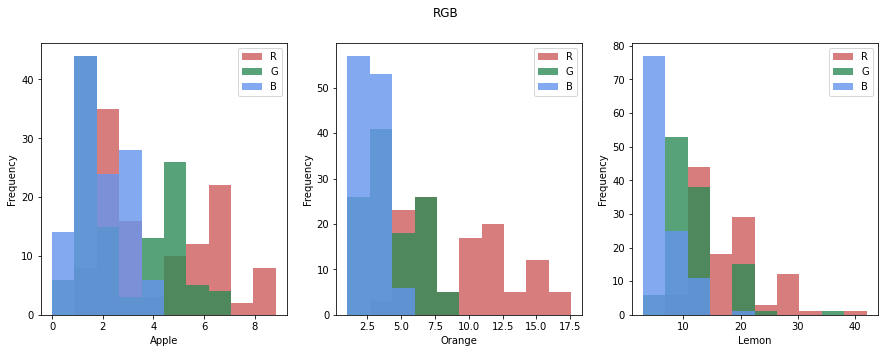

In [10]:
colors = ['indianred','seagreen','cornflowerblue']
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("RGB")
apple[RGB_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[0],color=colors)
orange[RGB_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[1],color=colors)
lemon[RGB_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[2],color=colors)
axes[0].set_xlabel("Apple")
axes[1].set_xlabel("Orange")
axes[2].set_xlabel("Lemon")

Text(0.5, 0, 'Lemon')

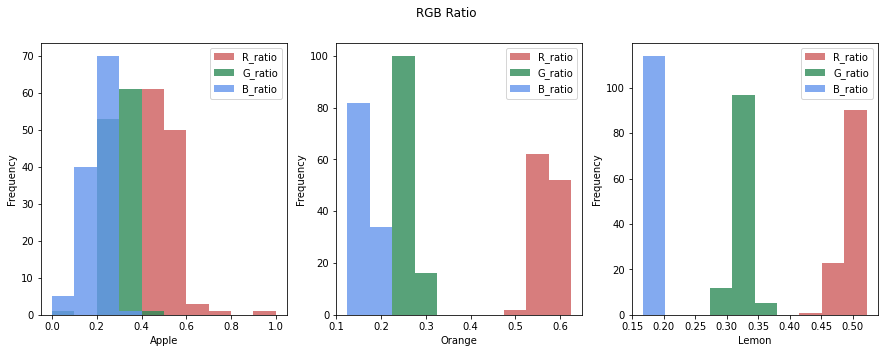

In [11]:
RGB_ratio_cols = ['R_ratio','G_ratio','B_ratio']
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("RGB Ratio")
apple[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[0],color=colors)
orange[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[1],color=colors)
lemon[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[2],color=colors)
axes[0].set_xlabel("Apple")
axes[1].set_xlabel("Orange")
axes[2].set_xlabel("Lemon")

Text(0.5, 1.0, 'Lemon')

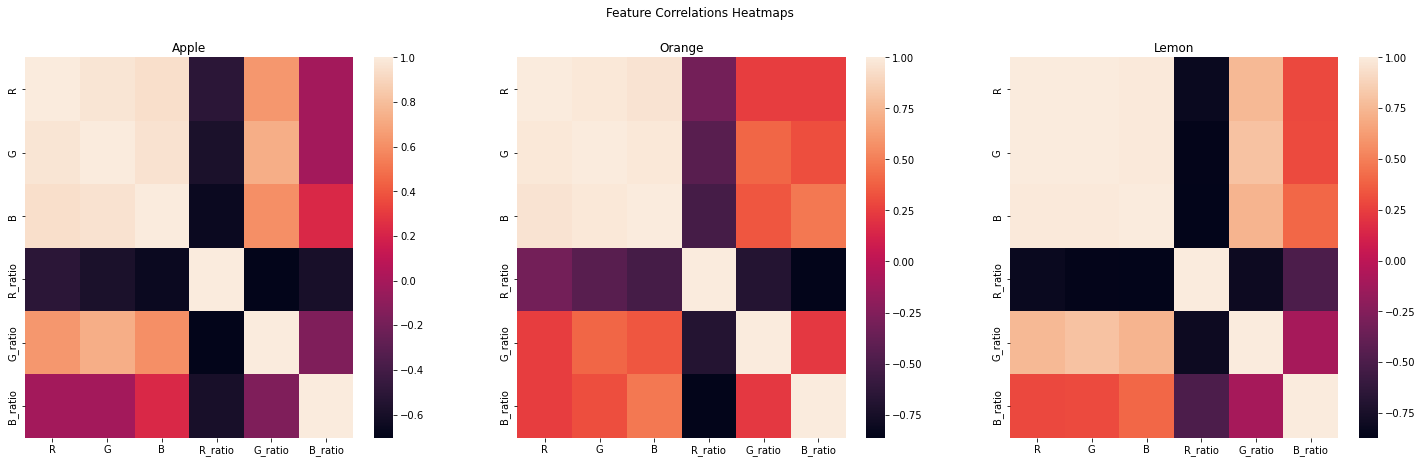

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
fig.suptitle("Feature Correlations Heatmaps")
sns.heatmap(apple.drop("Class", axis=1).corr(), ax=axes[0])
sns.heatmap(orange.drop("Class", axis=1).corr(), ax=axes[1])
sns.heatmap(lemon.drop("Class", axis=1).corr(), ax=axes[2])
axes[0].set_title("Apple")
axes[1].set_title("Orange")
axes[2].set_title("Lemon")

## Preprocessing Data

In [13]:
apple_X = apple.drop('Class', axis=1)
apple_y = apple['Class']
orange_X = orange.drop('Class', axis=1)
orange_y = orange['Class']
lemon_X = lemon.drop('Class', axis=1)
lemon_y = lemon['Class']

from sklearn.model_selection import train_test_split
a_X, a_val_X, a_y, a_val_y = train_test_split(apple_X, apple_y, test_size=0.25, random_state=42)
o_X, o_val_X, o_y, o_val_y = train_test_split(orange_X, orange_y, test_size=0.25, random_state=42)
l_X, l_val_X, l_y, l_val_y = train_test_split(lemon_X, lemon_y, test_size=0.25, random_state=42)

train_X = pd.concat([a_X,o_X,l_X], axis = 0)
train_y = pd.concat([a_y,o_y,l_y], axis = 0)
val_X = pd.concat([a_val_X,o_val_X,l_val_X], axis = 0)
val_y = pd.concat([a_val_y,o_val_y,l_val_y], axis = 0)

In [14]:
apple_test = pd.read_csv("Apple_test.csv", names=['R','G','B','Class'])
orange_test = pd.read_csv("Orange_test.csv", names=['R','G','B','Class'])
lemon_test = pd.read_csv("Lemon_test.csv", names=['R','G','B','Class'])

orange_test.head()

,R,G,B,Class
0,7.33,3.10,2.07,1
1,7.23,3.10,2.07,1
2,7.23,3.10,2.07,1
3,7.23,3.10,2.07,1
4,6.83,3.10,2.07,1


In [15]:
test_datasets = [apple_test, orange_test, lemon_test]
for dataset in test_datasets:
    dataset['R_ratio'] = dataset['R']/dataset[RGB_cols].sum(axis=1)
    dataset['G_ratio'] = dataset['G']/dataset[RGB_cols].sum(axis=1)
    dataset['B_ratio'] = dataset['B']/dataset[RGB_cols].sum(axis=1)
    
lemon_test.head()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
0,9.77,6.73,3.67,2,0.48,0.33,0.18
1,10.33,7.23,4.13,2,0.48,0.33,0.19
2,10.27,7.20,4.13,2,0.48,0.33,0.19
3,9.93,7.00,4.03,2,0.47,0.33,0.19
4,9.90,6.67,3.70,2,0.49,0.33,0.18


In [16]:
test_data = pd.concat(test_datasets, axis = 0)
test_truth_label = test_data['Class']
test_data = test_data.drop('Class', axis=1)
test_data.head()

,R,G,B,R_ratio,G_ratio,B_ratio
0,2.07,1.03,1.03,0.50,0.25,0.25
1,2.07,1.03,1.03,0.50,0.25,0.25
2,2.07,1.03,1.03,0.50,0.25,0.25
3,2.83,1.80,1.03,0.50,0.32,0.18
4,3.10,2.07,1.03,0.50,0.33,0.17


Text(0.5, 0, 'Lemon')

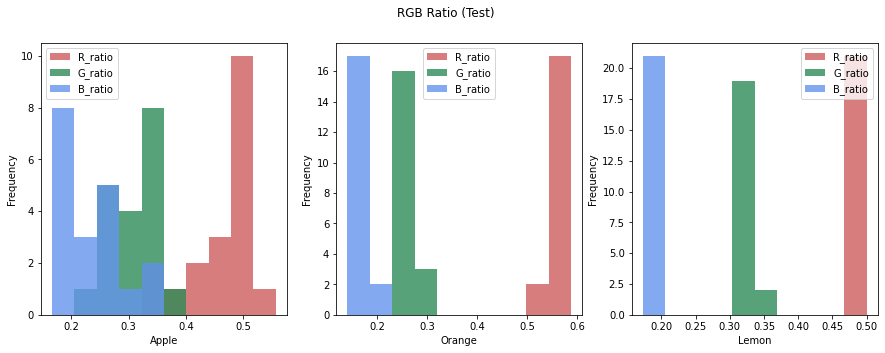

In [17]:
RGB_ratio_cols = ['R_ratio','G_ratio','B_ratio']
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("RGB Ratio (Test)")
apple_test[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[0],color=colors)
orange_test[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[1],color=colors)
lemon_test[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[2],color=colors)
axes[0].set_xlabel("Apple")
axes[1].set_xlabel("Orange")
axes[2].set_xlabel("Lemon")

In [18]:
print(val_X.shape, val_y.shape, test_data.shape, test_truth_label.shape)

(87, 6) (87,) (59, 6) (59,)


## DNN and CV

In [19]:
from tensorflow import keras
num_classes = 3
train_y = keras.utils.to_categorical(train_y, num_classes)
val_y = keras.utils.to_categorical(val_y, num_classes)

tf.random.set_seed(42)

In [20]:
# 6 inputs -> [# hidden nodes] -> 3 outputs
def create_DNN(unit):
    """Creates DNN architecture"""
    model = tf.keras.Sequential()
    # Dense all to all
    model.add(tf.keras.layers.Dense(unit, input_shape = [6], activation = 'relu'))
    model.add(tf.keras.layers.Dense(unit, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    #soft max
    model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))
    print("created DNN")
    
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    print("compiled DNN")
    
    return model

In [21]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
model=KerasRegressor(build_fn=create_DNN)

params = {'batch_size':[8, 16, 32], 
          'epochs':[100, 200, 300],
          'unit':[10, 12, 14]
           }
### Grid Search on edge values
gs = GridSearchCV(estimator=model, param_grid=params, cv=10)
gs_result = gs.fit(train_X, train_y)

/var/folders/vv/k8xpjtpj1sg_1f9xsw518z100000gn/T/ipykernel_16016/4032525635.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasRegressor(build_fn=create_DNN)
2022-04-24 21:00:26.170972: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


created DNN
compiled DNN
Epoch 1/100
30/30 [==============================] - 1s 5ms/step - loss: 1.9487 - accuracy: 0.3648
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 1.3345 - accuracy: 0.3433
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0880 - accuracy: 0.3691
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0349 - accuracy: 0.3348
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0224 - accuracy: 0.3562
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9805 - accuracy: 0.4077
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9143 - accuracy: 0.4850
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8979 - accuracy: 0.5279
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9355 - accuracy: 0.5193
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8797 - a

30/30 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.7897
Epoch 83/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.7940
Epoch 84/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8283
Epoch 85/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8240
Epoch 86/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8240
Epoch 87/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8412
Epoch 88/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8069
Epoch 89/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8069
Epoch 90/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.7940
Epoch 91/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.7854
Epoch 92/100


30/30 [==============================] - 0s 2ms/step - loss: 0.7836 - accuracy: 0.5880
Epoch 64/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7714 - accuracy: 0.5966
Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7976 - accuracy: 0.5579
Epoch 66/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7545 - accuracy: 0.6223
Epoch 67/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7359 - accuracy: 0.5966
Epoch 68/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7185 - accuracy: 0.6524
Epoch 69/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7742 - accuracy: 0.5880
Epoch 70/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.6395
Epoch 71/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7533 - accuracy: 0.6009
Epoch 72/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7428 - accuracy: 0.6137
Epoch 73/100


30/30 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8584
Epoch 45/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8197
Epoch 46/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8197
Epoch 47/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8455
Epoch 48/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8326
Epoch 49/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8369
Epoch 50/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8283
Epoch 51/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8541
Epoch 52/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8884
Epoch 53/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8712
Epoch 54/100


30/30 [==============================] - 0s 1ms/step - loss: 0.8922 - accuracy: 0.6567
Epoch 26/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9179 - accuracy: 0.6352
Epoch 27/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9261 - accuracy: 0.6052
Epoch 28/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8684 - accuracy: 0.6996
Epoch 29/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8919 - accuracy: 0.6266
Epoch 30/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8301 - accuracy: 0.6910
Epoch 31/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8597 - accuracy: 0.6609
Epoch 32/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8579 - accuracy: 0.6609
Epoch 33/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8081 - accuracy: 0.7382
Epoch 34/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8314 - accuracy: 0.6910
Epoch 35/100


Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9895 - accuracy: 0.4592
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9906 - accuracy: 0.4464
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9880 - accuracy: 0.4464
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9335 - accuracy: 0.5193
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9249 - accuracy: 0.5236
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9333 - accuracy: 0.5150
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9051 - accuracy: 0.5451
Epoch 13/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9330 - accuracy: 0.5536
Epoch 14/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8929 - accuracy: 0.5408
Epoch 15/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8491 - accuracy: 0.5966
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7768
Epoch 88/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7940
Epoch 89/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.8069
Epoch 90/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8498
Epoch 91/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7811
Epoch 92/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8326
Epoch 93/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8112
Epoch 94/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.8026
Epoch 95/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.8326
Epoch 96/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7768
Epoch 97/100


30/30 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8240
Epoch 69/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.8240
Epoch 70/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8240
Epoch 71/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8412
Epoch 72/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8455
Epoch 73/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8369
Epoch 74/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8369
Epoch 75/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8541
Epoch 76/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8326
Epoch 77/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8455
Epoch 78/100


30/30 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.6867
Epoch 50/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7167
Epoch 51/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.7296
Epoch 52/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5352 - accuracy: 0.7039
Epoch 53/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.6781
Epoch 54/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.6953
Epoch 55/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.6910
Epoch 56/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7382
Epoch 57/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7468
Epoch 58/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.7124
Epoch 59/100


Epoch 30/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9338 - accuracy: 0.5408
Epoch 31/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9173 - accuracy: 0.5193
Epoch 32/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9212 - accuracy: 0.5579
Epoch 33/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8905 - accuracy: 0.6094
Epoch 34/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9458 - accuracy: 0.5579
Epoch 35/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9114 - accuracy: 0.5837
Epoch 36/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8975 - accuracy: 0.5579
Epoch 37/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9105 - accuracy: 0.6009
Epoch 38/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8968 - accuracy: 0.6052
Epoch 39/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8914 - accuracy: 0.5794


30/30 [==============================] - 0s 1ms/step - loss: 0.9089 - accuracy: 0.5794
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8798 - accuracy: 0.6094
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8571 - accuracy: 0.6309
Epoch 13/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7920 - accuracy: 0.6481
Epoch 14/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.6738
Epoch 15/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8124 - accuracy: 0.6481
Epoch 16/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7572 - accuracy: 0.6352
Epoch 17/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7746 - accuracy: 0.6695
Epoch 18/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.6824
Epoch 19/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.7897
Epoch 20/100


30/30 [==============================] - 0s 1ms/step - loss: 0.2195 - accuracy: 0.9056
Epoch 93/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8884
Epoch 94/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9227
Epoch 95/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2206 - accuracy: 0.9056
Epoch 96/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.8841
Epoch 97/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.9013
Epoch 98/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9099
Epoch 99/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9013
Epoch 100/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 1.0000
created DNN
compiled DNN
Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 3.1286 - accurac

30/30 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.6838
Epoch 74/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7094
Epoch 75/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.7222
Epoch 76/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6453
Epoch 77/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.6752
Epoch 78/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5867 - accuracy: 0.7094
Epoch 79/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7137
Epoch 80/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.7009
Epoch 81/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.6795
Epoch 82/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.6795
Epoch 83/100


30/30 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.7253
Epoch 55/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7468
Epoch 56/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.6652
Epoch 57/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.7167
Epoch 58/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.7296
Epoch 59/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.7382
Epoch 60/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.6996
Epoch 61/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.7339
Epoch 62/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.6824
Epoch 63/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7253
Epoch 64/100


30/30 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.7597
Epoch 36/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7811
Epoch 37/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5473 - accuracy: 0.7811
Epoch 38/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5876 - accuracy: 0.7725
Epoch 39/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.7597
Epoch 40/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.7854
Epoch 41/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.7940
Epoch 42/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.8026
Epoch 43/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7897
Epoch 44/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7811
Epoch 45/100


30/30 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.6867
Epoch 17/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.6137
Epoch 18/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7302 - accuracy: 0.7039
Epoch 19/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.6910
Epoch 20/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.6824
Epoch 21/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6867
Epoch 22/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7043 - accuracy: 0.6695
Epoch 23/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.7210
Epoch 24/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6652
Epoch 25/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6481
Epoch 26/100


30/30 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7511
Epoch 99/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8112
Epoch 100/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9615
created DNN
compiled DNN
Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 3.8995 - accuracy: 0.3004
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 2.4633 - accuracy: 0.3906
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1.9671 - accuracy: 0.3648
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 1.8117 - accuracy: 0.3090
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 1.7002 - accuracy: 0.3519
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 1.3750 - accuracy: 0.3863
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0953 - accuracy: 0.4

30/30 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8627
Epoch 80/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8755
Epoch 81/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9013
Epoch 82/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.8798
Epoch 83/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8927
Epoch 84/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8798
Epoch 85/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8927
Epoch 86/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8627
Epoch 87/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8841
Epoch 88/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.9142
Epoch 89/100


30/30 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.6738
Epoch 61/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.6824
Epoch 62/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7873 - accuracy: 0.6223
Epoch 63/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6867
Epoch 64/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.6438
Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6609
Epoch 66/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.7082
Epoch 67/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7342 - accuracy: 0.6910
Epoch 68/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.7296
Epoch 69/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6781
Epoch 70/100


30/30 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.9056
Epoch 42/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8670
Epoch 43/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8283
Epoch 44/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8455
Epoch 45/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.8240
Epoch 46/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8240
Epoch 47/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8412
Epoch 48/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8712
Epoch 49/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8841
Epoch 50/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8627
Epoch 51/100


30/30 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.7082
Epoch 23/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.6867
Epoch 24/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7151 - accuracy: 0.6137
Epoch 25/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.6652
Epoch 26/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6781
Epoch 27/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.7082
Epoch 28/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.7210
Epoch 29/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7296
Epoch 30/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7682
Epoch 31/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.7296
Epoch 32/100


30/30 [==============================] - 0s 1ms/step - loss: 1.5920 - accuracy: 0.2146
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 1.2530 - accuracy: 0.3476
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 1.2079 - accuracy: 0.3262
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0932 - accuracy: 0.3734
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0884 - accuracy: 0.4635
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9741 - accuracy: 0.4979
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9209 - accuracy: 0.5794
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9035 - accuracy: 0.5880
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8290 - accuracy: 0.6266
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8335 - accuracy: 0.6094
Epoch 12/100
30/30 [

30/30 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.8927
Epoch 85/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.9099
Epoch 86/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.8712
Epoch 87/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9142
Epoch 88/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9099
Epoch 89/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9185
Epoch 90/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.9013
Epoch 91/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.8755
Epoch 92/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.8798
Epoch 93/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2352 - accuracy: 0.8884
Epoch 94/100


30/30 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.6953
Epoch 66/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.7082
Epoch 67/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.7339
Epoch 68/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6953
Epoch 69/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6996
Epoch 70/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.6953
Epoch 71/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7133 - accuracy: 0.6567
Epoch 72/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6953
Epoch 73/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.7167
Epoch 74/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.7339
Epoch 75/100


30/30 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8291
Epoch 47/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8675
Epoch 48/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8291
Epoch 49/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8333
Epoch 50/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8419
Epoch 51/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7949
Epoch 52/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8333
Epoch 53/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8291
Epoch 54/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8162
Epoch 55/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8462
Epoch 56/100


30/30 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.7554
Epoch 28/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7468
Epoch 29/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.7682
Epoch 30/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7854
Epoch 31/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.7897
Epoch 32/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.8240
Epoch 33/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8197
Epoch 34/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7940
Epoch 35/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.8541
Epoch 36/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7854
Epoch 37/100


30/30 [==============================] - 0s 1ms/step - loss: 0.9086 - accuracy: 0.5365
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9308 - accuracy: 0.5665
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8339 - accuracy: 0.6695
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8158 - accuracy: 0.6738
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7649 - accuracy: 0.7468
Epoch 13/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7443 - accuracy: 0.7039
Epoch 14/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7152 - accuracy: 0.7511
Epoch 15/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7123 - accuracy: 0.7511
Epoch 16/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.7725
Epoch 17/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.7682
Epoch 18/100
3

30/30 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9099
Epoch 91/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9313
Epoch 92/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9270
Epoch 93/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9013
Epoch 94/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.9142
Epoch 95/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9485
Epoch 96/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.8884
Epoch 97/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.9142
Epoch 98/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2494 - accuracy: 0.9099
Epoch 99/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.8712
Epoch 100/100

30/30 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8841
Epoch 72/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8584
Epoch 73/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8627
Epoch 74/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8927
Epoch 75/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2979 - accuracy: 0.8798
Epoch 76/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.8798
Epoch 77/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8455
Epoch 78/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8798
Epoch 79/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8712
Epoch 80/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.9013
Epoch 81/100


30/30 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7768
Epoch 53/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.7983
Epoch 54/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8498
Epoch 55/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8069
Epoch 56/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8197
Epoch 57/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.7983
Epoch 58/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8112
Epoch 59/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.7983
Epoch 60/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8069
Epoch 61/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8541
Epoch 62/100


30/30 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7854
Epoch 34/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.7597
Epoch 35/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.8197
Epoch 36/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7854
Epoch 37/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4921 - accuracy: 0.7725
Epoch 38/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7382
Epoch 39/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8197
Epoch 40/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.7554
Epoch 41/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5087 - accuracy: 0.7468
Epoch 42/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7983
Epoch 43/100


30/30 [==============================] - 0s 1ms/step - loss: 0.7459 - accuracy: 0.6395
Epoch 15/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.7124
Epoch 16/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7427 - accuracy: 0.6695
Epoch 17/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.7082
Epoch 18/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7210
Epoch 19/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6328 - accuracy: 0.7339
Epoch 20/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.7039
Epoch 21/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.6996
Epoch 22/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.7682
Epoch 23/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.7082
Epoch 24/100


30/30 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.9056
Epoch 97/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.8927
Epoch 98/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8755
Epoch 99/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2516 - accuracy: 0.8884
Epoch 100/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9615
created DNN
compiled DNN
Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 2.7841 - accuracy: 0.2876
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 2.0424 - accuracy: 0.2618
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1.5377 - accuracy: 0.3648
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 1.2944 - accuracy: 0.4421
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 1.1271 - accuracy: 0

30/30 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8670
Epoch 78/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8884
Epoch 79/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.8798
Epoch 80/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8755
Epoch 81/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8841
Epoch 82/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8841
Epoch 83/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2783 - accuracy: 0.8884
Epoch 84/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.9185
Epoch 85/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.8884
Epoch 86/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.8927
Epoch 87/100


30/30 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8884
Epoch 59/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2711 - accuracy: 0.9013
Epoch 60/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8927
Epoch 61/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.9013
Epoch 62/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2790 - accuracy: 0.9013
Epoch 63/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8970
Epoch 64/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8884
Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2554 - accuracy: 0.8970
Epoch 66/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8798
Epoch 67/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8927
Epoch 68/100


30/30 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8369
Epoch 40/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8498
Epoch 41/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8541
Epoch 42/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.8712
Epoch 43/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8412
Epoch 44/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8240
Epoch 45/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8455
Epoch 46/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8283
Epoch 47/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8541
Epoch 48/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8455
Epoch 49/100


30/30 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.8419
Epoch 21/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7692
Epoch 22/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7564
Epoch 23/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.8462
Epoch 24/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.8034
Epoch 25/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.8034
Epoch 26/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.8077
Epoch 27/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7778
Epoch 28/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7778
Epoch 29/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8376
Epoch 30/100


Epoch 1/200
30/30 [==============================] - 0s 1ms/step - loss: 1.3744 - accuracy: 0.3991
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1709 - accuracy: 0.3219
Epoch 3/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9776 - accuracy: 0.4850
Epoch 4/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9385 - accuracy: 0.5451
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9466 - accuracy: 0.4850
Epoch 6/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9321 - accuracy: 0.5322
Epoch 7/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8952 - accuracy: 0.5923
Epoch 8/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8558 - accuracy: 0.5751
Epoch 9/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9177 - accuracy: 0.5536
Epoch 10/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8696 - accuracy: 0.5665
Epoch 11/

30/30 [==============================] - 0s 1ms/step - loss: 0.7214 - accuracy: 0.6223
Epoch 84/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6567
Epoch 85/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.7124
Epoch 86/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6781
Epoch 87/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.7296
Epoch 88/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7210
Epoch 89/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.7039
Epoch 90/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.6481
Epoch 91/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6867
Epoch 92/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7554
Epoch 93/200


30/30 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6738
Epoch 165/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6781
Epoch 166/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6024 - accuracy: 0.6910
Epoch 167/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7468
Epoch 168/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.7339
Epoch 169/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.7296
Epoch 170/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7253
Epoch 171/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.6867
Epoch 172/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7210
Epoch 173/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7124
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7811
Epoch 45/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7597
Epoch 46/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7296
Epoch 47/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7682
Epoch 48/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7639
Epoch 49/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.7768
Epoch 50/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7382
Epoch 51/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.7039
Epoch 52/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7639
Epoch 53/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7639
Epoch 54/200


30/30 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.7854
Epoch 126/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.7597
Epoch 127/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3867 - accuracy: 0.8112
Epoch 128/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8069
Epoch 129/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8412
Epoch 130/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.7983
Epoch 131/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8069
Epoch 132/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.7897
Epoch 133/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7811
Epoch 134/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.7854
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.9040 - accuracy: 0.5150
Epoch 6/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9084 - accuracy: 0.5579
Epoch 7/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8777 - accuracy: 0.6395
Epoch 8/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8262 - accuracy: 0.6223
Epoch 9/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8118 - accuracy: 0.6395
Epoch 10/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8033 - accuracy: 0.6953
Epoch 11/200
30/30 [==============================] - 0s 2ms/step - loss: 0.7756 - accuracy: 0.6567
Epoch 12/200
30/30 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.7210
Epoch 13/200
30/30 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.7124
Epoch 14/200
30/30 [==============================] - 0s 2ms/step - loss: 0.7394 - accuracy: 0.7124
Epoch 15/200
30/3

30/30 [==============================] - 0s 929us/step - loss: 0.3482 - accuracy: 0.8798
Epoch 88/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8970
Epoch 89/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8841
Epoch 90/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8455
Epoch 91/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8670
Epoch 92/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8627
Epoch 93/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8755
Epoch 94/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8455
Epoch 95/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8069
Epoch 96/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8670
Epoch 97/20

30/30 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8970
Epoch 169/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8627
Epoch 170/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8798
Epoch 171/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8755
Epoch 172/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.8884
Epoch 173/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8970
Epoch 174/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8755
Epoch 175/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8798
Epoch 176/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8884
Epoch 177/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8627
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.7897
Epoch 49/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.7639
Epoch 50/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7597
Epoch 51/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.7725
Epoch 52/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.7511
Epoch 53/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.8155
Epoch 54/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.7811
Epoch 55/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.7597
Epoch 56/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8026
Epoch 57/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7983
Epoch 58/200


30/30 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.8755
Epoch 130/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.8755
Epoch 131/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.8798
Epoch 132/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2554 - accuracy: 0.8927
Epoch 133/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.8627
Epoch 134/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8541
Epoch 135/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8369
Epoch 136/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8841
Epoch 137/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2937 - accuracy: 0.8670
Epoch 138/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.8712
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 1.0558 - accuracy: 0.4120
Epoch 10/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9148 - accuracy: 0.4592
Epoch 11/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8374 - accuracy: 0.4678
Epoch 12/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8506 - accuracy: 0.4979
Epoch 13/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8056 - accuracy: 0.5494
Epoch 14/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7713 - accuracy: 0.5794
Epoch 15/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7700 - accuracy: 0.5751
Epoch 16/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7828 - accuracy: 0.5708
Epoch 17/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.6524
Epoch 18/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6395
Epoch 19/200


30/30 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8240
Epoch 92/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8412
Epoch 93/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8240
Epoch 94/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8326
Epoch 95/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7940
Epoch 96/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.8197
Epoch 97/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8112
Epoch 98/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8155
Epoch 99/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8283
Epoch 100/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8283
Epoch 101/20

30/30 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8884
Epoch 173/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.8970
Epoch 174/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.8841
Epoch 175/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8841
Epoch 176/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8584
Epoch 177/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8455
Epoch 178/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8240
Epoch 179/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8326
Epoch 180/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8541
Epoch 181/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8712
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.8155
Epoch 53/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8155
Epoch 54/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.8069
Epoch 55/200
30/30 [==============================] - 0s 5ms/step - loss: 0.5121 - accuracy: 0.7854
Epoch 56/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7983
Epoch 57/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.8026
Epoch 58/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7811
Epoch 59/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7940
Epoch 60/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7854
Epoch 61/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7725
Epoch 62/200


30/30 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8155
Epoch 134/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.7940
Epoch 135/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8541
Epoch 136/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8112
Epoch 137/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8541
Epoch 138/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.8584
Epoch 139/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8498
Epoch 140/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8326
Epoch 141/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8369
Epoch 142/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8369
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.8963 - accuracy: 0.5880
Epoch 14/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8666 - accuracy: 0.5708
Epoch 15/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9130 - accuracy: 0.5236
Epoch 16/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8033 - accuracy: 0.6438
Epoch 17/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8192 - accuracy: 0.5923
Epoch 18/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7915 - accuracy: 0.6309
Epoch 19/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7622 - accuracy: 0.6652
Epoch 20/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7671 - accuracy: 0.6223
Epoch 21/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7574 - accuracy: 0.6567
Epoch 22/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7437 - accuracy: 0.6738
Epoch 23/200


30/30 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7682
Epoch 96/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7811
Epoch 97/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7768
Epoch 98/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.7983
Epoch 99/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7811
Epoch 100/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7897
Epoch 101/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7897
Epoch 102/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8112
Epoch 103/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8197
Epoch 104/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.7983
Epoch 10

30/30 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8841
Epoch 177/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8627
Epoch 178/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8112
Epoch 179/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8112
Epoch 180/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8240
Epoch 181/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8283
Epoch 182/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8197
Epoch 183/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8283
Epoch 184/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8240
Epoch 185/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8155
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8240
Epoch 57/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7725
Epoch 58/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7983
Epoch 59/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8026
Epoch 60/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.7897
Epoch 61/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8155
Epoch 62/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7983
Epoch 63/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8026
Epoch 64/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.7639
Epoch 65/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8283
Epoch 66/200


30/30 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8455
Epoch 138/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7940
Epoch 139/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8369
Epoch 140/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8498
Epoch 141/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7940
Epoch 142/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8283
Epoch 143/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8541
Epoch 144/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8240
Epoch 145/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8369
Epoch 146/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8584
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.8500 - accuracy: 0.5966
Epoch 18/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8397 - accuracy: 0.5365
Epoch 19/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8325 - accuracy: 0.5665
Epoch 20/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8350 - accuracy: 0.6137
Epoch 21/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8083 - accuracy: 0.6223
Epoch 22/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8088 - accuracy: 0.6223
Epoch 23/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8289 - accuracy: 0.6180
Epoch 24/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7872 - accuracy: 0.6009
Epoch 25/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7658 - accuracy: 0.6481
Epoch 26/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8028 - accuracy: 0.6137
Epoch 27/200


30/30 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.8069
Epoch 100/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.8541
Epoch 101/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.8112
Epoch 102/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8412
Epoch 103/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.7897
Epoch 104/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.8026
Epoch 105/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.8455
Epoch 106/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.8498
Epoch 107/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8498
Epoch 108/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.8412
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8584
Epoch 181/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.8155
Epoch 182/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8927
Epoch 183/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8498
Epoch 184/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.8112
Epoch 185/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.8326
Epoch 186/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8627
Epoch 187/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.8412
Epoch 188/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7897
Epoch 189/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8412
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.7137
Epoch 61/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.6538
Epoch 62/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.6368
Epoch 63/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.6197
Epoch 64/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7308
Epoch 65/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.7094
Epoch 66/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.6581
Epoch 67/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.6197
Epoch 68/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.7265
Epoch 69/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.6453
Epoch 70/200


30/30 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.7051
Epoch 142/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.6880
Epoch 143/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.7521
Epoch 144/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.6838
Epoch 145/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7308
Epoch 146/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.7009
Epoch 147/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5439 - accuracy: 0.7308
Epoch 148/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7222
Epoch 149/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7521
Epoch 150/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7393
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.6652
Epoch 22/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7342 - accuracy: 0.6609
Epoch 23/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.6652
Epoch 24/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7124
Epoch 25/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.6738
Epoch 26/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.7296
Epoch 27/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7425
Epoch 28/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.7082
Epoch 29/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.6824
Epoch 30/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.6910
Epoch 31/200


30/30 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8798
Epoch 104/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8970
Epoch 105/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.9013
Epoch 106/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8798
Epoch 107/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8755
Epoch 108/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8841
Epoch 109/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8798
Epoch 110/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8670
Epoch 111/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8755
Epoch 112/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.9099
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.8927
Epoch 185/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2595 - accuracy: 0.9227
Epoch 186/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.8841
Epoch 187/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8927
Epoch 188/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8712
Epoch 189/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8584
Epoch 190/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8841
Epoch 191/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.9356
Epoch 192/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8927
Epoch 193/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8841
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8412
Epoch 65/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8197
Epoch 66/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8584
Epoch 67/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8927
Epoch 68/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8541
Epoch 69/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8326
Epoch 70/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8712
Epoch 71/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8584
Epoch 72/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8755
Epoch 73/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8155
Epoch 74/200


30/30 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.8841
Epoch 146/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8240
Epoch 147/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8841
Epoch 148/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8584
Epoch 149/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8927
Epoch 150/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8755
Epoch 151/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.8498
Epoch 152/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8884
Epoch 153/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.9013
Epoch 154/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8627
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.8197
Epoch 26/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7854
Epoch 27/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8069
Epoch 28/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8455
Epoch 29/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8197
Epoch 30/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8369
Epoch 31/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8369
Epoch 32/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8069
Epoch 33/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8584
Epoch 34/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8369
Epoch 35/200


30/30 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.8755
Epoch 107/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8755
Epoch 108/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.9013
Epoch 109/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9227
Epoch 110/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.8670
Epoch 111/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2269 - accuracy: 0.9270
Epoch 112/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8755
Epoch 113/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.9142
Epoch 114/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.8326
Epoch 115/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8498
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.9013
Epoch 188/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.8970
Epoch 189/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.9099
Epoch 190/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.8927
Epoch 191/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.9099
Epoch 192/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.9142
Epoch 193/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2612 - accuracy: 0.9013
Epoch 194/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2305 - accuracy: 0.8927
Epoch 195/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9227
Epoch 196/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2062 - accuracy: 0.9227
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8240
Epoch 68/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8712
Epoch 69/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8455
Epoch 70/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8197
Epoch 71/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.8455
Epoch 72/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8326
Epoch 73/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8369
Epoch 74/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.8283
Epoch 75/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7983
Epoch 76/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8240
Epoch 77/200


30/30 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8584
Epoch 149/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.9013
Epoch 150/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8584
Epoch 151/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8584
Epoch 152/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8712
Epoch 153/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8240
Epoch 154/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8755
Epoch 155/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8627
Epoch 156/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8712
Epoch 157/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 0.8498
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.8155
Epoch 29/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7854
Epoch 30/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7897
Epoch 31/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.8283
Epoch 32/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.7854
Epoch 33/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8240
Epoch 34/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8240
Epoch 35/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8584
Epoch 36/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8584
Epoch 37/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8155
Epoch 38/200


30/30 [==============================] - 0s 1ms/step - loss: 0.1967 - accuracy: 0.9485
Epoch 110/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9614
Epoch 111/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9571
Epoch 112/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8927
Epoch 113/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9056
Epoch 114/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9485
Epoch 115/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.8970
Epoch 116/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.9099
Epoch 117/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.9270
Epoch 118/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9185
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9399
Epoch 191/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9485
Epoch 192/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1552 - accuracy: 0.9485
Epoch 193/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1765 - accuracy: 0.9270
Epoch 194/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9442
Epoch 195/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9313
Epoch 196/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1651 - accuracy: 0.9442
Epoch 197/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9442
Epoch 198/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9399
Epoch 199/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1525 - accuracy: 0.9399
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.7597
Epoch 71/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7854
Epoch 72/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7639
Epoch 73/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7639
Epoch 74/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7597
Epoch 75/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8155
Epoch 76/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.7725
Epoch 77/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.8112
Epoch 78/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.8283
Epoch 79/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.8026
Epoch 80/200


30/30 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.7725
Epoch 152/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.7940
Epoch 153/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7554
Epoch 154/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7897
Epoch 155/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.7811
Epoch 156/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.7854
Epoch 157/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7854
Epoch 158/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8155
Epoch 159/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8026
Epoch 160/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8455
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6652
Epoch 32/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6781
Epoch 33/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.6910
Epoch 34/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7210
Epoch 35/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.6867
Epoch 36/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.6738
Epoch 37/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6738
Epoch 38/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6517 - accuracy: 0.6695
Epoch 39/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.7082
Epoch 40/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.7082
Epoch 41/200


30/30 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8369
Epoch 113/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8798
Epoch 114/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8283
Epoch 115/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8197
Epoch 116/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8498
Epoch 117/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8283
Epoch 118/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8326
Epoch 119/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8541
Epoch 120/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8369
Epoch 121/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8841
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8584
Epoch 194/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8627
Epoch 195/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.8841
Epoch 196/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.8841
Epoch 197/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.8712
Epoch 198/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2865 - accuracy: 0.8627
Epoch 199/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.8841
Epoch 200/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2975 - accuracy: 0.8462
created DNN
compiled DNN
Epoch 1/200
30/30 [==============================] - 0s 1ms/step - loss: 2.4406 - accuracy: 0.3219
Epoch 2/200
30/30 [==============================] - 0s 1ms/step - loss: 1.6855 - ac

Epoch 74/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.8326
Epoch 75/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.8541
Epoch 76/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.8369
Epoch 77/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8584
Epoch 78/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8412
Epoch 79/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.8369
Epoch 80/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8412
Epoch 81/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8712
Epoch 82/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8798
Epoch 83/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8455


30/30 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8970
Epoch 156/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.8498
Epoch 157/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8712
Epoch 158/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8584
Epoch 159/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8541
Epoch 160/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8584
Epoch 161/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8197
Epoch 162/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8712
Epoch 163/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8541
Epoch 164/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8541
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.8498
Epoch 36/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.8412
Epoch 37/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.8412
Epoch 38/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7854
Epoch 39/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7897
Epoch 40/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.8112
Epoch 41/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.8283
Epoch 42/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.8069
Epoch 43/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.8155
Epoch 44/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8283
Epoch 45/200


30/30 [==============================] - 0s 1ms/step - loss: 0.3582 - accuracy: 0.8498
Epoch 117/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3169 - accuracy: 0.8755
Epoch 118/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8112
Epoch 119/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8498
Epoch 120/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8627
Epoch 121/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8541
Epoch 122/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8712
Epoch 123/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8455
Epoch 124/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8798
Epoch 125/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8283
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.2712 - accuracy: 0.8884
Epoch 198/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8069
Epoch 199/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8927
Epoch 200/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 1.0000
created DNN
compiled DNN
Epoch 1/200
30/30 [==============================] - 0s 1ms/step - loss: 2.6661 - accuracy: 0.3632
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 1.8784 - accuracy: 0.2863
Epoch 3/200
30/30 [==============================] - 0s 1ms/step - loss: 1.4189 - accuracy: 0.2735
Epoch 4/200
30/30 [==============================] - 0s 1ms/step - loss: 1.1005 - accuracy: 0.3462
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 1.0406 - accuracy: 0.4017
Epoch 6/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9651 - accuracy: 

30/30 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8632
Epoch 79/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8803
Epoch 80/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8932
Epoch 81/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8590
Epoch 82/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8846
Epoch 83/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8504
Epoch 84/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8590
Epoch 85/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8632
Epoch 86/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.8889
Epoch 87/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8504
Epoch 88/200


30/30 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.8803
Epoch 160/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8333
Epoch 161/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.8889
Epoch 162/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.8846
Epoch 163/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2821 - accuracy: 0.8889
Epoch 164/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8632
Epoch 165/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.8761
Epoch 166/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8675
Epoch 167/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8504
Epoch 168/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2977 - accuracy: 0.8761
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8584
Epoch 40/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.8326
Epoch 41/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.8326
Epoch 42/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.8240
Epoch 43/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.8412
Epoch 44/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8670
Epoch 45/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.8283
Epoch 46/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.8326
Epoch 47/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8369
Epoch 48/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8412
Epoch 49/200


30/30 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8283
Epoch 121/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8326
Epoch 122/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8369
Epoch 123/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3117 - accuracy: 0.8369
Epoch 124/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8240
Epoch 125/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8498
Epoch 126/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8927
Epoch 127/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8369
Epoch 128/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8498
Epoch 129/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8197
Epoc

4/4 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
created DNN
compiled DNN
Epoch 1/200
30/30 [==============================] - 0s 1ms/step - loss: 3.6226 - accuracy: 0.2876
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 2.2801 - accuracy: 0.3691
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 1.7902 - accuracy: 0.3562
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 1.6570 - accuracy: 0.4163
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 1.4030 - accuracy: 0.3991
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 1.0887 - accuracy: 0.4464
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 1.0100 - accuracy: 0.5021
Epoch 8/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8485 - accuracy: 0.6953
Epoch 9/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8104 - accuracy: 0.6652

30/30 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8670
Epoch 82/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.8884
Epoch 83/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.8627
Epoch 84/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8584
Epoch 85/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2419 - accuracy: 0.8970
Epoch 86/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8412
Epoch 87/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.8927
Epoch 88/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.8970
Epoch 89/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.8755
Epoch 90/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8541
Epoch 91/200


30/30 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.9013
Epoch 163/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1966 - accuracy: 0.9227
Epoch 164/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.8841
Epoch 165/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.9099
Epoch 166/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.9227
Epoch 167/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9142
Epoch 168/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1583 - accuracy: 0.9356
Epoch 169/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1897 - accuracy: 0.8970
Epoch 170/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.9485
Epoch 171/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9142
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8670
Epoch 43/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8455
Epoch 44/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8755
Epoch 45/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.9099
Epoch 46/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8584
Epoch 47/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8841
Epoch 48/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8670
Epoch 49/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.8584
Epoch 50/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8841
Epoch 51/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.9013
Epoch 52/200


30/30 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9270
Epoch 124/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.8970
Epoch 125/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9485
Epoch 126/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9485
Epoch 127/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 0.9313
Epoch 128/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9270
Epoch 129/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9571
Epoch 130/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9442
Epoch 131/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.9185
Epoch 132/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9313
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 1.3441 - accuracy: 0.3047
Epoch 4/200
30/30 [==============================] - 0s 1ms/step - loss: 1.1224 - accuracy: 0.3348
Epoch 5/200
30/30 [==============================] - 0s 1ms/step - loss: 1.0632 - accuracy: 0.3948
Epoch 6/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9797 - accuracy: 0.4850
Epoch 7/200
30/30 [==============================] - 0s 1ms/step - loss: 0.9344 - accuracy: 0.5494
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9097 - accuracy: 0.5494
Epoch 9/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9036 - accuracy: 0.5622
Epoch 10/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8297 - accuracy: 0.6009
Epoch 11/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8062 - accuracy: 0.6352
Epoch 12/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8319 - accuracy: 0.5923
Epoch 13/200
30/30 

30/30 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8627
Epoch 86/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8927
Epoch 87/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8970
Epoch 88/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8884
Epoch 89/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8841
Epoch 90/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8712
Epoch 91/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8584
Epoch 92/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8798
Epoch 93/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8584
Epoch 94/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8841
Epoch 95/200


30/30 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.9227
Epoch 167/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.9056
Epoch 168/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.9099
Epoch 169/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9399
Epoch 170/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.9227
Epoch 171/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2553 - accuracy: 0.9227
Epoch 172/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.9013
Epoch 173/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2515 - accuracy: 0.9185
Epoch 174/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9571
Epoch 175/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.8927
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8584
Epoch 47/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.8670
Epoch 48/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8498
Epoch 49/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8369
Epoch 50/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9013
Epoch 51/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.8584
Epoch 52/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.8927
Epoch 53/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.8798
Epoch 54/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.8970
Epoch 55/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8584
Epoch 56/200


30/30 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.8627
Epoch 128/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2049 - accuracy: 0.8884
Epoch 129/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.8755
Epoch 130/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1895 - accuracy: 0.9270
Epoch 131/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9142
Epoch 132/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2086 - accuracy: 0.9185
Epoch 133/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2090 - accuracy: 0.9099
Epoch 134/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.8712
Epoch 135/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.8927
Epoch 136/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.8884
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.8411 - accuracy: 0.6266
Epoch 8/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8021 - accuracy: 0.6309
Epoch 9/200
30/30 [==============================] - 0s 1ms/step - loss: 0.8280 - accuracy: 0.5751
Epoch 10/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7509 - accuracy: 0.6652
Epoch 11/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7691 - accuracy: 0.6567
Epoch 12/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7571 - accuracy: 0.6524
Epoch 13/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7210 - accuracy: 0.6781
Epoch 14/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.6824
Epoch 15/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7192 - accuracy: 0.6781
Epoch 16/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.6867
Epoch 17/200
30

30/30 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.9356
Epoch 90/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2738 - accuracy: 0.8841
Epoch 91/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2265 - accuracy: 0.9142
Epoch 92/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9056
Epoch 93/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.9013
Epoch 94/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.9313
Epoch 95/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9227
Epoch 96/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2712 - accuracy: 0.9185
Epoch 97/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9142
Epoch 98/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.9099
Epoch 99/200


30/30 [==============================] - 0s 1ms/step - loss: 0.1760 - accuracy: 0.9399
Epoch 171/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.9227
Epoch 172/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9399
Epoch 173/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1959 - accuracy: 0.9227
Epoch 174/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9142
Epoch 175/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1826 - accuracy: 0.9485
Epoch 176/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 0.9099
Epoch 177/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9056
Epoch 178/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9270
Epoch 179/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2073 - accuracy: 0.9399
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8283
Epoch 51/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8155
Epoch 52/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8927
Epoch 53/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8584
Epoch 54/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8927
Epoch 55/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8326
Epoch 56/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8112
Epoch 57/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8455
Epoch 58/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8670
Epoch 59/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8541
Epoch 60/200


30/30 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9485
Epoch 132/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.9356
Epoch 133/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9270
Epoch 134/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2679 - accuracy: 0.8970
Epoch 135/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9142
Epoch 136/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.9185
Epoch 137/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.9142
Epoch 138/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.8970
Epoch 139/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.9099
Epoch 140/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9356
Epoc

30/30 [==============================] - 0s 936us/step - loss: 0.7805 - accuracy: 0.7296
Epoch 12/200
30/30 [==============================] - 0s 1ms/step - loss: 0.7032 - accuracy: 0.7639
Epoch 13/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.8112
Epoch 14/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.7768
Epoch 15/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.7768
Epoch 16/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7940
Epoch 17/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.8369
Epoch 18/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.8155
Epoch 19/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.7725
Epoch 20/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.8326
Epoch 21/20

30/30 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 0.8970
Epoch 94/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9313
Epoch 95/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9056
Epoch 96/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.9227
Epoch 97/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9356
Epoch 98/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9099
Epoch 99/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9142
Epoch 100/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1774 - accuracy: 0.9056
Epoch 101/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9356
Epoch 102/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9227
Epoch 103/

30/30 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9442
Epoch 175/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1626 - accuracy: 0.9270
Epoch 176/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9142
Epoch 177/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9142
Epoch 178/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1746 - accuracy: 0.9185
Epoch 179/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.9185
Epoch 180/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9399
Epoch 181/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9571
Epoch 182/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9227
Epoch 183/200
30/30 [==============================] - 0s 1ms/step - loss: 0.1491 - accuracy: 0.9399
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7339
Epoch 55/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5500 - accuracy: 0.7039
Epoch 56/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.6953
Epoch 57/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7039
Epoch 58/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7725
Epoch 59/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.6567
Epoch 60/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.7039
Epoch 61/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.6867
Epoch 62/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.6738
Epoch 63/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7468
Epoch 64/200


30/30 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7124
Epoch 136/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.7639
Epoch 137/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7339
Epoch 138/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7425
Epoch 139/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7382
Epoch 140/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7511
Epoch 141/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7253
Epoch 142/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7597
Epoch 143/200
30/30 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7682
Epoch 144/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.6910
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.7265
Epoch 16/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.7308
Epoch 17/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.7607
Epoch 18/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.7350
Epoch 19/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7393
Epoch 20/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.7650
Epoch 21/200
30/30 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.7350
Epoch 22/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5444 - accuracy: 0.7906
Epoch 23/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5509 - accuracy: 0.8077
Epoch 24/200
30/30 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7607
Epoch 25/200


30/30 [==============================] - 0s 1ms/step - loss: 0.2554 - accuracy: 0.8932
Epoch 98/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8632
Epoch 99/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.8932
Epoch 100/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8675
Epoch 101/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8376
Epoch 102/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8803
Epoch 103/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8675
Epoch 104/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.8675
Epoch 105/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2952 - accuracy: 0.8675
Epoch 106/200
30/30 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8803
Epoch 

30/30 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.8974
Epoch 179/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8632
Epoch 180/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.8590
Epoch 181/200
30/30 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.8803
Epoch 182/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.8632
Epoch 183/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2091 - accuracy: 0.8932
Epoch 184/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.8675
Epoch 185/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8718
Epoch 186/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.8675
Epoch 187/200
30/30 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9060
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.6180
Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6781
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.6223
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.6137
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6395
Epoch 63/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6180
Epoch 64/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.6524
Epoch 65/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6652
Epoch 66/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6309
Epoch 67/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.6137
Epoch 68/100


15/15 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.8369
Epoch 40/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.8541
Epoch 41/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8712
Epoch 42/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8369
Epoch 43/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.8283
Epoch 44/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8798
Epoch 45/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8541
Epoch 46/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8541
Epoch 47/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8670
Epoch 48/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8541
Epoch 49/100


15/15 [==============================] - 0s 957us/step - loss: 0.9889 - accuracy: 0.4678
Epoch 21/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9519 - accuracy: 0.5150
Epoch 22/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9285 - accuracy: 0.4721
Epoch 23/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9153 - accuracy: 0.4807
Epoch 24/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8946 - accuracy: 0.5408
Epoch 25/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.5322
Epoch 26/100
15/15 [==============================] - 0s 1ms/step - loss: 0.8978 - accuracy: 0.4893
Epoch 27/100
15/15 [==============================] - 0s 1ms/step - loss: 0.8990 - accuracy: 0.5107
Epoch 28/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.5150
Epoch 29/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8661 - accuracy: 0.5451
Epoch 30/10

2/2 [==============================] - 0s 4ms/step - loss: 0.8600 - accuracy: 0.6154
created DNN
compiled DNN
Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 1.6904 - accuracy: 0.2403
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.4723 - accuracy: 0.3133
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.3535 - accuracy: 0.3348
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1523 - accuracy: 0.3734
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0294 - accuracy: 0.4249
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9970 - accuracy: 0.4592
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9210 - accuracy: 0.5451
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.8879 - accuracy: 0.5837
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.5494

15/15 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8541
Epoch 82/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5307 - accuracy: 0.7511
Epoch 83/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8326
Epoch 84/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8369
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8498
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8627
Epoch 87/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8240
Epoch 88/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8627
Epoch 89/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8670
Epoch 90/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8712
Epoch 91/100


15/15 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7468
Epoch 55/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8026
Epoch 56/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8455
Epoch 57/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8326
Epoch 58/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.7554
Epoch 59/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7854
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8412
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8155
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7768
Epoch 63/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8240
Epoch 64/100


15/15 [==============================] - 0s 4ms/step - loss: 0.7664 - accuracy: 0.5880
Epoch 36/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7946 - accuracy: 0.5365
Epoch 37/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7709 - accuracy: 0.5579
Epoch 38/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7830 - accuracy: 0.5536
Epoch 39/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7840 - accuracy: 0.5236
Epoch 40/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7894 - accuracy: 0.5494
Epoch 41/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7754 - accuracy: 0.5408
Epoch 42/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7639 - accuracy: 0.5365
Epoch 43/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7853 - accuracy: 0.5322
Epoch 44/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7570 - accuracy: 0.5408
Epoch 45/100


15/15 [==============================] - 0s 3ms/step - loss: 0.8509 - accuracy: 0.6524
Epoch 17/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.6867
Epoch 18/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8006 - accuracy: 0.6996
Epoch 19/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7895 - accuracy: 0.6910
Epoch 20/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8149 - accuracy: 0.6738
Epoch 21/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7490 - accuracy: 0.6996
Epoch 22/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7471 - accuracy: 0.7082
Epoch 23/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.7082
Epoch 24/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.7210
Epoch 25/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.7725
Epoch 26/100


15/15 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8712
Epoch 99/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8455
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.8846
created DNN
compiled DNN
Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 2.1220 - accuracy: 0.4120
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.7471 - accuracy: 0.3948
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1.2728 - accuracy: 0.4549
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0484 - accuracy: 0.4764
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9694 - accuracy: 0.5451
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9659 - accuracy: 0.5622
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9300 - accuracy: 0.5

15/15 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.6867
Epoch 80/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.6738
Epoch 81/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.6524
Epoch 82/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.6609
Epoch 83/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.6609
Epoch 84/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.6524
Epoch 85/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.6867
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.6953
Epoch 87/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.7253
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.7039
Epoch 89/100


15/15 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8455
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.8369
Epoch 62/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.8283
Epoch 63/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.8197
Epoch 64/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.8069
Epoch 65/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.8069
Epoch 66/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7940
Epoch 67/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.8069
Epoch 68/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.8240
Epoch 69/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7854
Epoch 70/100


15/15 [==============================] - 0s 1ms/step - loss: 0.9027 - accuracy: 0.5256
Epoch 42/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9077 - accuracy: 0.5684
Epoch 43/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9003 - accuracy: 0.5171
Epoch 44/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8724 - accuracy: 0.5855
Epoch 45/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9069 - accuracy: 0.5427
Epoch 46/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.5470
Epoch 47/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.5299
Epoch 48/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.5556
Epoch 49/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8560 - accuracy: 0.5299
Epoch 50/100
15/15 [==============================] - 0s 1ms/step - loss: 0.8957 - accuracy: 0.5513
Epoch 51/100


15/15 [==============================] - 0s 2ms/step - loss: 0.7596 - accuracy: 0.6738
Epoch 23/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7698 - accuracy: 0.6609
Epoch 24/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7956 - accuracy: 0.6137
Epoch 25/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7754 - accuracy: 0.6395
Epoch 26/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.6180
Epoch 27/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7417 - accuracy: 0.6738
Epoch 28/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.6438
Epoch 29/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7585 - accuracy: 0.6781
Epoch 30/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7548 - accuracy: 0.6438
Epoch 31/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7718 - accuracy: 0.6438
Epoch 32/100


Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1147 - accuracy: 0.4163
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0317 - accuracy: 0.4120
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9702 - accuracy: 0.4206
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9775 - accuracy: 0.4163
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9196 - accuracy: 0.4979
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9366 - accuracy: 0.4850
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9441 - accuracy: 0.5064
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9396 - accuracy: 0.5107
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9238 - accuracy: 0.5408
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.5494
Epoch 1

Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7468
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.7082
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7425
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.7811
Epoch 89/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7296
Epoch 90/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.7124
Epoch 91/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8026
Epoch 92/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7639
Epoch 93/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.6524
Epoch 94/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7210


15/15 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.8584
Epoch 66/100
15/15 [==============================] - 0s 982us/step - loss: 0.2887 - accuracy: 0.8755
Epoch 67/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8326
Epoch 68/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8541
Epoch 69/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8326
Epoch 70/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8541
Epoch 71/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8841
Epoch 72/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8841
Epoch 73/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8283
Epoch 74/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8584
Epoch 75/10

15/15 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7468
Epoch 47/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.7167
Epoch 48/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7296
Epoch 49/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5250 - accuracy: 0.6996
Epoch 50/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7082
Epoch 51/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7425
Epoch 52/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7253
Epoch 53/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7124
Epoch 54/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7339
Epoch 55/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.6910
Epoch 56/100


15/15 [==============================] - 0s 1ms/step - loss: 0.7425 - accuracy: 0.7597
Epoch 28/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.7940
Epoch 29/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.7597
Epoch 30/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.8197
Epoch 31/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.8026
Epoch 32/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7897
Epoch 33/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.8240
Epoch 34/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.7811
Epoch 35/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.7811
Epoch 36/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.8197
Epoch 37/100


Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8285 - accuracy: 0.6180
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8087 - accuracy: 0.7082
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.6910
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7936 - accuracy: 0.6824
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.7339
Epoch 13/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7429 - accuracy: 0.6781
Epoch 14/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7534 - accuracy: 0.7167
Epoch 15/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.7210
Epoch 16/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.7382
Epoch 17/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7187 - accuracy: 0.7554
Ep

15/15 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8369
Epoch 90/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7854
Epoch 91/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8112
Epoch 92/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8112
Epoch 93/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.8112
Epoch 94/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.8112
Epoch 95/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7940
Epoch 96/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7897
Epoch 97/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7897
Epoch 98/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.8197
Epoch 99/100


15/15 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8584
Epoch 71/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8541
Epoch 72/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8927
Epoch 73/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8627
Epoch 74/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.7983
Epoch 75/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8455
Epoch 76/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8498
Epoch 77/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8884
Epoch 78/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8927
Epoch 79/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8455
Epoch 80/100


15/15 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.7382
Epoch 52/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.7082
Epoch 53/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6910
Epoch 54/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7554
Epoch 55/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6120 - accuracy: 0.7039
Epoch 56/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.7253
Epoch 57/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7210
Epoch 58/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.6996
Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7597
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7210
Epoch 61/100


15/15 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.7039
Epoch 33/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.6910
Epoch 34/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.6824
Epoch 35/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.7082
Epoch 36/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.6395
Epoch 37/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.7210
Epoch 38/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.7382
Epoch 39/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.7167
Epoch 40/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.7253
Epoch 41/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.6996
Epoch 42/100


15/15 [==============================] - 0s 1ms/step - loss: 0.7492 - accuracy: 0.7137
Epoch 14/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.7863
Epoch 15/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.7692
Epoch 16/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.7863
Epoch 17/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.8034
Epoch 18/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.8376
Epoch 19/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5882 - accuracy: 0.7949
Epoch 20/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.8205
Epoch 21/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.8248
Epoch 22/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7521
Epoch 23/100


15/15 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.8803
Epoch 96/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.8803
Epoch 97/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8761
Epoch 98/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8205
Epoch 99/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8846
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 1.0000
created DNN
compiled DNN
Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 1.2611 - accuracy: 0.3391
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1208 - accuracy: 0.3648
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0583 - accuracy: 0.4421
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0460 - accuracy: 

15/15 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7682
Epoch 77/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7639
Epoch 78/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7768
Epoch 79/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8026
Epoch 80/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8069
Epoch 81/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8069
Epoch 82/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8412
Epoch 83/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8069
Epoch 84/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7854
Epoch 85/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8712
Epoch 86/100


15/15 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8240
Epoch 58/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8240
Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8541
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8326
Epoch 61/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8369
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8498
Epoch 63/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8712
Epoch 64/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.9099
Epoch 65/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.8798
Epoch 66/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8498
Epoch 67/100


15/15 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.8283
Epoch 39/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7082
Epoch 40/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7382
Epoch 41/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.8584
Epoch 42/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7854
Epoch 43/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.8026
Epoch 44/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8197
Epoch 45/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8326
Epoch 46/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8283
Epoch 47/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8498
Epoch 48/100


15/15 [==============================] - 0s 1ms/step - loss: 0.8774 - accuracy: 0.5193
Epoch 20/100
15/15 [==============================] - 0s 1ms/step - loss: 0.8461 - accuracy: 0.5665
Epoch 21/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8363 - accuracy: 0.5494
Epoch 22/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8285 - accuracy: 0.5966
Epoch 23/100
15/15 [==============================] - 0s 1ms/step - loss: 0.8364 - accuracy: 0.5536
Epoch 24/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8138 - accuracy: 0.5536
Epoch 25/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.5365
Epoch 26/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7988 - accuracy: 0.5794
Epoch 27/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.5751
Epoch 28/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.5579
Epoch 29/100


2/2 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.4615
created DNN
compiled DNN
Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 2.3046 - accuracy: 0.2361
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.6604 - accuracy: 0.2876
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.4757 - accuracy: 0.2704
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1.3499 - accuracy: 0.3047
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1438 - accuracy: 0.3605
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1320 - accuracy: 0.3348
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0269 - accuracy: 0.4249
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9446 - accuracy: 0.4592
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9922 - accuracy: 0.4249

15/15 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.9099
Epoch 82/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9270
Epoch 83/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9099
Epoch 84/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9356
Epoch 85/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9142
Epoch 86/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9227
Epoch 87/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9399
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9099
Epoch 89/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9185
Epoch 90/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9185
Epoch 91/100


15/15 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8841
Epoch 63/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.8712
Epoch 64/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8884
Epoch 65/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8841
Epoch 66/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8670
Epoch 67/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8712
Epoch 68/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.9013
Epoch 69/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8541
Epoch 70/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8798
Epoch 71/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8712
Epoch 72/100


15/15 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8240
Epoch 44/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8584
Epoch 45/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8112
Epoch 46/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8455
Epoch 47/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8369
Epoch 48/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8026
Epoch 49/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7725
Epoch 50/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8197
Epoch 51/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8112
Epoch 52/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8369
Epoch 53/100


15/15 [==============================] - 0s 2ms/step - loss: 0.7258 - accuracy: 0.7253
Epoch 25/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.7339
Epoch 26/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.7983
Epoch 27/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.8069
Epoch 28/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7854
Epoch 29/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7768
Epoch 30/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7983
Epoch 31/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.8197
Epoch 32/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.8455
Epoch 33/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5542 - accuracy: 0.8283
Epoch 34/100


Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 1.6574 - accuracy: 0.3476
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.4127 - accuracy: 0.3605
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1.3242 - accuracy: 0.3176
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1.3120 - accuracy: 0.3605
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1.2130 - accuracy: 0.4120
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 1.2202 - accuracy: 0.3863
Epoch 11/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1509 - accuracy: 0.4549
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1017 - accuracy: 0.4850
Epoch 13/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0264 - accuracy: 0.5236
Epoch 14/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9645 - accuracy: 0.5622
Epoch

15/15 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.9142
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8712
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8884
Epoch 89/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8884
Epoch 90/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.9185
Epoch 91/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8970
Epoch 92/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8627
Epoch 93/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.9099
Epoch 94/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9485
Epoch 95/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8884
Epoch 96/100


15/15 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8590
Epoch 68/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8077
Epoch 69/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8932
Epoch 70/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8632
Epoch 71/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8333
Epoch 72/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8547
Epoch 73/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8889
Epoch 74/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8077
Epoch 75/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8590
Epoch 76/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8376
Epoch 77/100


15/15 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6481
Epoch 49/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.7425
Epoch 50/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.7339
Epoch 51/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7554
Epoch 52/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7811
Epoch 53/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7682
Epoch 54/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7468
Epoch 55/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.6652
Epoch 56/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6738
Epoch 57/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5876 - accuracy: 0.7253
Epoch 58/200


15/15 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7854
Epoch 130/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8240
Epoch 131/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7854
Epoch 132/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8026
Epoch 133/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7597
Epoch 134/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7811
Epoch 135/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8455
Epoch 136/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4996 - accuracy: 0.7468
Epoch 137/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7768
Epoch 138/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8197
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.9374 - accuracy: 0.5021
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8323 - accuracy: 0.5923
Epoch 11/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8654 - accuracy: 0.5322
Epoch 12/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8770 - accuracy: 0.5150
Epoch 13/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8791 - accuracy: 0.5451
Epoch 14/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8561 - accuracy: 0.5536
Epoch 15/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7726 - accuracy: 0.6266
Epoch 16/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7921 - accuracy: 0.5665
Epoch 17/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8077 - accuracy: 0.5665
Epoch 18/200
15/15 [==============================] - 0s 3ms/step - loss: 0.7378 - accuracy: 0.6438
Epoch 19/200


15/15 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8326
Epoch 92/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.8069
Epoch 93/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.8240
Epoch 94/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.8155
Epoch 95/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5407 - accuracy: 0.7597
Epoch 96/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8326
Epoch 97/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.8069
Epoch 98/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.8541
Epoch 99/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.8069
Epoch 100/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.8112
Epoch 101/20

15/15 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8712
Epoch 173/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8670
Epoch 174/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8670
Epoch 175/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8326
Epoch 176/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8455
Epoch 177/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8026
Epoch 178/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8584
Epoch 179/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8197
Epoch 180/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8498
Epoch 181/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.8155
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.7993 - accuracy: 0.6438
Epoch 53/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7794 - accuracy: 0.6438
Epoch 54/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7691 - accuracy: 0.6609
Epoch 55/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8016 - accuracy: 0.6481
Epoch 56/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7994 - accuracy: 0.6266
Epoch 57/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7590 - accuracy: 0.6738
Epoch 58/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7367 - accuracy: 0.6652
Epoch 59/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7914 - accuracy: 0.6352
Epoch 60/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7933 - accuracy: 0.6137
Epoch 61/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7710 - accuracy: 0.6352
Epoch 62/200


15/15 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.7468
Epoch 134/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7210
Epoch 135/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7597
Epoch 136/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7296
Epoch 137/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7296
Epoch 138/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7468
Epoch 139/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7253
Epoch 140/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7339
Epoch 141/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7082
Epoch 142/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7339
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 1.0345 - accuracy: 0.4206
Epoch 14/200
15/15 [==============================] - 0s 1ms/step - loss: 1.0032 - accuracy: 0.4936
Epoch 15/200
15/15 [==============================] - 0s 1ms/step - loss: 0.9962 - accuracy: 0.4549
Epoch 16/200
15/15 [==============================] - 0s 1ms/step - loss: 0.9938 - accuracy: 0.4506
Epoch 17/200
15/15 [==============================] - 0s 1ms/step - loss: 0.9572 - accuracy: 0.5279
Epoch 18/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9635 - accuracy: 0.4678
Epoch 19/200
15/15 [==============================] - 0s 1ms/step - loss: 0.9441 - accuracy: 0.4549
Epoch 20/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8999 - accuracy: 0.5236
Epoch 21/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.5365
Epoch 22/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.4850
Epoch 23/200


15/15 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.6953
Epoch 96/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7597
Epoch 97/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7124
Epoch 98/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7082
Epoch 99/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7210
Epoch 100/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.6996
Epoch 101/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7768
Epoch 102/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7597
Epoch 103/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7425
Epoch 104/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7253
Epoch 10

15/15 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7296
Epoch 177/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.7983
Epoch 178/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7339
Epoch 179/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7639
Epoch 180/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.7983
Epoch 181/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7167
Epoch 182/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7425
Epoch 183/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.7639
Epoch 184/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.7768
Epoch 185/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7382
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7768
Epoch 57/200
15/15 [==============================] - 0s 994us/step - loss: 0.5720 - accuracy: 0.8026
Epoch 58/200
15/15 [==============================] - 0s 928us/step - loss: 0.6006 - accuracy: 0.7897
Epoch 59/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7682
Epoch 60/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.8026
Epoch 61/200
15/15 [==============================] - 0s 912us/step - loss: 0.5242 - accuracy: 0.8369
Epoch 62/200
15/15 [==============================] - 0s 970us/step - loss: 0.5594 - accuracy: 0.8026
Epoch 63/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.8069
Epoch 64/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.8069
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7983
Epoch

15/15 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8197
Epoch 138/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8455
Epoch 139/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8498
Epoch 140/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8541
Epoch 141/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8326
Epoch 142/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8627
Epoch 143/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8541
Epoch 144/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8283
Epoch 145/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8498
Epoch 146/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7725
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.8808 - accuracy: 0.6738
Epoch 18/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7728 - accuracy: 0.7554
Epoch 19/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8035 - accuracy: 0.6695
Epoch 20/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7774 - accuracy: 0.7039
Epoch 21/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7295 - accuracy: 0.7425
Epoch 22/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.7597
Epoch 23/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7358 - accuracy: 0.7382
Epoch 24/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.7725
Epoch 25/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.7468
Epoch 26/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.7597
Epoch 27/200


15/15 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7983
Epoch 100/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.8112
Epoch 101/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7940
Epoch 102/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.8069
Epoch 103/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7725
Epoch 104/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8498
Epoch 105/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8240
Epoch 106/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8627
Epoch 107/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7940
Epoch 108/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7854
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8498
Epoch 181/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8326
Epoch 182/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8069
Epoch 183/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8670
Epoch 184/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8412
Epoch 185/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8455
Epoch 186/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8670
Epoch 187/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8283
Epoch 188/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8283
Epoch 189/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8069
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.6043 - accuracy: 0.7339
Epoch 61/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7768
Epoch 62/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7210
Epoch 63/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7425
Epoch 64/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7854
Epoch 65/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.7339
Epoch 66/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.7425
Epoch 67/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7425
Epoch 68/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.7811
Epoch 69/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.6910
Epoch 70/200


15/15 [==============================] - 0s 989us/step - loss: 0.3192 - accuracy: 0.8670
Epoch 142/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8841
Epoch 143/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.9056
Epoch 144/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8798
Epoch 145/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8541
Epoch 146/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8627
Epoch 147/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8584
Epoch 148/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8798
Epoch 149/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8841
Epoch 150/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8670
Ep

15/15 [==============================] - 0s 2ms/step - loss: 0.9014 - accuracy: 0.5923
Epoch 22/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8676 - accuracy: 0.6438
Epoch 23/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8770 - accuracy: 0.6223
Epoch 24/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8675 - accuracy: 0.6266
Epoch 25/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.6309
Epoch 26/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8100 - accuracy: 0.6438
Epoch 27/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8331 - accuracy: 0.5837
Epoch 28/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7889 - accuracy: 0.6481
Epoch 29/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7909 - accuracy: 0.6438
Epoch 30/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7967 - accuracy: 0.6352
Epoch 31/200


15/15 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.7811
Epoch 104/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.7639
Epoch 105/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8240
Epoch 106/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.7940
Epoch 107/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7682
Epoch 108/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8069
Epoch 109/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8326
Epoch 110/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8069
Epoch 111/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.7983
Epoch 112/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8240
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8841
Epoch 185/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8326
Epoch 186/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8369
Epoch 187/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8197
Epoch 188/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8240
Epoch 189/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8112
Epoch 190/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8369
Epoch 191/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8069
Epoch 192/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8326
Epoch 193/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8283
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.7940
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7597
Epoch 66/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.8026
Epoch 67/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.7940
Epoch 68/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.8155
Epoch 69/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.8069
Epoch 70/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.8155
Epoch 71/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8112
Epoch 72/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.7768
Epoch 73/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.8155
Epoch 74/200


15/15 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.8069
Epoch 146/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7983
Epoch 147/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8197
Epoch 148/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8240
Epoch 149/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8197
Epoch 150/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8584
Epoch 151/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8455
Epoch 152/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8197
Epoch 153/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8455
Epoch 154/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8197
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.8162
Epoch 26/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7692
Epoch 27/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.8034
Epoch 28/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7949
Epoch 29/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.7949
Epoch 30/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.8248
Epoch 31/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7949
Epoch 32/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.8205
Epoch 33/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7735
Epoch 34/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8077
Epoch 35/200


Epoch 107/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8376
Epoch 108/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8632
Epoch 109/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8761
Epoch 110/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8590
Epoch 111/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8889
Epoch 112/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8846
Epoch 113/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8547
Epoch 114/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8803
Epoch 115/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8632
Epoch 116/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3388 - accurac

15/15 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8590
Epoch 189/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8291
Epoch 190/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8803
Epoch 191/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8077
Epoch 192/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3056 - accuracy: 0.8846
Epoch 193/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8761
Epoch 194/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8590
Epoch 195/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8846
Epoch 196/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8590
Epoch 197/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.8761
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8712
Epoch 69/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8584
Epoch 70/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.9056
Epoch 71/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.9013
Epoch 72/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8798
Epoch 73/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8841
Epoch 74/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8627
Epoch 75/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.9185
Epoch 76/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8798
Epoch 77/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.9013
Epoch 78/200


15/15 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8970
Epoch 150/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.9056
Epoch 151/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9056
Epoch 152/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.9142
Epoch 153/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9313
Epoch 154/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2248 - accuracy: 0.9270
Epoch 155/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.8841
Epoch 156/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9142
Epoch 157/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9313
Epoch 158/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9270
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.8780 - accuracy: 0.5966
Epoch 30/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8547 - accuracy: 0.6180
Epoch 31/200
15/15 [==============================] - 0s 3ms/step - loss: 0.8682 - accuracy: 0.6052
Epoch 32/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.5966
Epoch 33/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8783 - accuracy: 0.6094
Epoch 34/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8343 - accuracy: 0.6481
Epoch 35/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.6395
Epoch 36/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8192 - accuracy: 0.6567
Epoch 37/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8761 - accuracy: 0.5494
Epoch 38/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8537 - accuracy: 0.6395
Epoch 39/200


15/15 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.8326
Epoch 111/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8197
Epoch 112/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7983
Epoch 113/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.8197
Epoch 114/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.8326
Epoch 115/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8283
Epoch 116/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8498
Epoch 117/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8455
Epoch 118/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8112
Epoch 119/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8627
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8927
Epoch 192/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8798
Epoch 193/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8584
Epoch 194/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8884
Epoch 195/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8755
Epoch 196/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8927
Epoch 197/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.9056
Epoch 198/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8712
Epoch 199/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8755
Epoch 200/200
2/2 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9231
create

Epoch 72/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.9056
Epoch 73/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8584
Epoch 74/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8541
Epoch 75/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8369
Epoch 76/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2663 - accuracy: 0.9056
Epoch 77/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8670
Epoch 78/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8670
Epoch 79/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8927
Epoch 80/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8412
Epoch 81/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8712


15/15 [==============================] - 0s 1ms/step - loss: 0.2591 - accuracy: 0.8755
Epoch 154/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2239 - accuracy: 0.9056
Epoch 155/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2356 - accuracy: 0.8970
Epoch 156/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9185
Epoch 157/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2221 - accuracy: 0.9056
Epoch 158/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2600 - accuracy: 0.8541
Epoch 159/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8884
Epoch 160/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8541
Epoch 161/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9270
Epoch 162/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9099
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.7856 - accuracy: 0.6180
Epoch 34/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7783 - accuracy: 0.6438
Epoch 35/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8063 - accuracy: 0.6524
Epoch 36/200
15/15 [==============================] - 0s 3ms/step - loss: 0.7448 - accuracy: 0.6781
Epoch 37/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7860 - accuracy: 0.6266
Epoch 38/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.6738
Epoch 39/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.7082
Epoch 40/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.6781
Epoch 41/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7826 - accuracy: 0.6137
Epoch 42/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7692 - accuracy: 0.6395
Epoch 43/200


15/15 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7983
Epoch 115/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.7983
Epoch 116/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7597
Epoch 117/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8155
Epoch 118/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7940
Epoch 119/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8155
Epoch 120/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7768
Epoch 121/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7897
Epoch 122/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.7983
Epoch 123/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8412
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8970
Epoch 196/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8841
Epoch 197/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8927
Epoch 198/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.8798
Epoch 199/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.8798
Epoch 200/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1724 - accuracy: 0.8846
created DNN
compiled DNN
Epoch 1/200
15/15 [==============================] - 1s 1ms/step - loss: 4.1873 - accuracy: 0.2833
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 3.2446 - accuracy: 0.3605
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 2.7942 - accuracy: 0.3605
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 2.1483 - accura

Epoch 76/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7167
Epoch 77/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7082
Epoch 78/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.6953
Epoch 79/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7124
Epoch 80/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7082
Epoch 81/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7296
Epoch 82/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7167
Epoch 83/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7339
Epoch 84/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7468
Epoch 85/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7039


15/15 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7339
Epoch 158/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8069
Epoch 159/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.7940
Epoch 160/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7940
Epoch 161/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8197
Epoch 162/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7897
Epoch 163/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8498
Epoch 164/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8455
Epoch 165/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7854
Epoch 166/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7511
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.7802 - accuracy: 0.5880
Epoch 38/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7918 - accuracy: 0.5751
Epoch 39/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8172 - accuracy: 0.6266
Epoch 40/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8152 - accuracy: 0.6266
Epoch 41/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7594 - accuracy: 0.7082
Epoch 42/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7937 - accuracy: 0.6567
Epoch 43/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.7210
Epoch 44/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7662 - accuracy: 0.6395
Epoch 45/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7290 - accuracy: 0.6996
Epoch 46/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.6695
Epoch 47/200


15/15 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7597
Epoch 119/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7554
Epoch 120/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.7639
Epoch 121/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.7811
Epoch 122/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.7511
Epoch 123/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.7940
Epoch 124/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.7897
Epoch 125/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7682
Epoch 126/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8197
Epoch 127/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7682
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.5246 - accuracy: 0.7811
Epoch 200/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.9615
created DNN
compiled DNN
Epoch 1/200
15/15 [==============================] - 0s 2ms/step - loss: 1.3694 - accuracy: 0.3562
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0770 - accuracy: 0.3820
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9331 - accuracy: 0.4464
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9491 - accuracy: 0.4592
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9551 - accuracy: 0.4421
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9033 - accuracy: 0.5064
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9583 - accuracy: 0.4592
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9170 - accuracy: 0.51

15/15 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8240
Epoch 81/200
15/15 [==============================] - 0s 989us/step - loss: 0.4298 - accuracy: 0.7897
Epoch 82/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8069
Epoch 83/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7854
Epoch 84/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8369
Epoch 85/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7811
Epoch 86/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8155
Epoch 87/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8283
Epoch 88/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8026
Epoch 89/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8240
Epoch 90/20

15/15 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8369
Epoch 162/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8498
Epoch 163/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8283
Epoch 164/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8455
Epoch 165/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8541
Epoch 166/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8498
Epoch 167/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8369
Epoch 168/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8283
Epoch 169/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8541
Epoch 170/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8326
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.7468
Epoch 42/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7554
Epoch 43/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.7768
Epoch 44/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7682
Epoch 45/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7725
Epoch 46/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.7983
Epoch 47/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7983
Epoch 48/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7940
Epoch 49/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5671 - accuracy: 0.8283
Epoch 50/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7639
Epoch 51/200


15/15 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8584
Epoch 123/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8584
Epoch 124/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.8412
Epoch 125/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8755
Epoch 126/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8069
Epoch 127/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8455
Epoch 128/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8455
Epoch 129/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8412
Epoch 130/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.8498
Epoch 131/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8412
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 1.1138 - accuracy: 0.3820
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1160 - accuracy: 0.3176
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0371 - accuracy: 0.4077
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9875 - accuracy: 0.4378
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9667 - accuracy: 0.5064
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9417 - accuracy: 0.4893
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9543 - accuracy: 0.5708
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9388 - accuracy: 0.5794
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9178 - accuracy: 0.5923
Epoch 11/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8540 - accuracy: 0.6867
Epoch 12/200
15/15 [

15/15 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8412
Epoch 85/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.9056
Epoch 86/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.9013
Epoch 87/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8927
Epoch 88/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.9099
Epoch 89/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.9013
Epoch 90/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8712
Epoch 91/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.9013
Epoch 92/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8369
Epoch 93/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8584
Epoch 94/200


15/15 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8798
Epoch 166/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2796 - accuracy: 0.8841
Epoch 167/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8927
Epoch 168/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.9013
Epoch 169/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8841
Epoch 170/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8670
Epoch 171/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8970
Epoch 172/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.9056
Epoch 173/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8970
Epoch 174/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.8798
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.7564
Epoch 46/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7479
Epoch 47/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5362 - accuracy: 0.8077
Epoch 48/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7821
Epoch 49/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.8291
Epoch 50/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7863
Epoch 51/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7821
Epoch 52/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.8419
Epoch 53/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7564
Epoch 54/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.8333
Epoch 55/200


15/15 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8761
Epoch 127/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8846
Epoch 128/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.9017
Epoch 129/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8761
Epoch 130/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8333
Epoch 131/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8504
Epoch 132/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8632
Epoch 133/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8761
Epoch 134/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8590
Epoch 135/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8803
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 1.7578 - accuracy: 0.3777
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 1.6361 - accuracy: 0.3648
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 1.3497 - accuracy: 0.4034
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1950 - accuracy: 0.4335
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1204 - accuracy: 0.5236
Epoch 11/200
15/15 [==============================] - 0s 3ms/step - loss: 1.0351 - accuracy: 0.5322
Epoch 12/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8790 - accuracy: 0.5751
Epoch 13/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8532 - accuracy: 0.5837
Epoch 14/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8471 - accuracy: 0.5794
Epoch 15/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7927 - accuracy: 0.6009
Epoch 16/200
15/

15/15 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7897
Epoch 89/200
15/15 [==============================] - 0s 4ms/step - loss: 0.4071 - accuracy: 0.8026
Epoch 90/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8155
Epoch 91/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8069
Epoch 92/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8197
Epoch 93/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8283
Epoch 94/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8326
Epoch 95/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8283
Epoch 96/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8155
Epoch 97/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8240
Epoch 98/200


15/15 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8069
Epoch 170/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8326
Epoch 171/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.7811
Epoch 172/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8584
Epoch 173/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8498
Epoch 174/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8240
Epoch 175/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.7983
Epoch 176/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8712
Epoch 177/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8541
Epoch 178/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 0.8197
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7597
Epoch 50/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.8026
Epoch 51/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.7554
Epoch 52/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7725
Epoch 53/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.8240
Epoch 54/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.8026
Epoch 55/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7854
Epoch 56/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7897
Epoch 57/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.8283
Epoch 58/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.8112
Epoch 59/200


15/15 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.9056
Epoch 131/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8712
Epoch 132/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8841
Epoch 133/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.9056
Epoch 134/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.9142
Epoch 135/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.9056
Epoch 136/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8927
Epoch 137/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8712
Epoch 138/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8755
Epoch 139/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8970
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.9413 - accuracy: 0.5193
Epoch 11/200
15/15 [==============================] - 0s 1ms/step - loss: 0.9732 - accuracy: 0.4893
Epoch 12/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8624 - accuracy: 0.5408
Epoch 13/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8779 - accuracy: 0.5322
Epoch 14/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8326 - accuracy: 0.5451
Epoch 15/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.5365
Epoch 16/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7500 - accuracy: 0.6395
Epoch 17/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.6695
Epoch 18/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7982 - accuracy: 0.6094
Epoch 19/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.6352
Epoch 20/200


15/15 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.9227
Epoch 92/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.9313
Epoch 93/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9442
Epoch 94/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2754 - accuracy: 0.9313
Epoch 95/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9614
Epoch 96/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.9356
Epoch 97/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9442
Epoch 98/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.9356
Epoch 99/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.9099
Epoch 100/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.9356
Epoch 101/20

15/15 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9399
Epoch 173/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9528
Epoch 174/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1758 - accuracy: 0.9571
Epoch 175/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9528
Epoch 176/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9399
Epoch 177/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9442
Epoch 178/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9442
Epoch 179/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9742
Epoch 180/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9356
Epoch 181/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9614
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.6910
Epoch 53/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7253
Epoch 54/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.7253
Epoch 55/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7253
Epoch 56/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7554
Epoch 57/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7124
Epoch 58/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7296
Epoch 59/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7124
Epoch 60/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.6953
Epoch 61/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7554
Epoch 62/200


15/15 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.7811
Epoch 134/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8369
Epoch 135/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8369
Epoch 136/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8369
Epoch 137/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8283
Epoch 138/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.7597
Epoch 139/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8112
Epoch 140/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8197
Epoch 141/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8240
Epoch 142/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8283
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.9393 - accuracy: 0.5622
Epoch 14/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9385 - accuracy: 0.5880
Epoch 15/200
15/15 [==============================] - 0s 4ms/step - loss: 0.8583 - accuracy: 0.6309
Epoch 16/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.5794
Epoch 17/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8067 - accuracy: 0.6781
Epoch 18/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8542 - accuracy: 0.6266
Epoch 19/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7609 - accuracy: 0.6996
Epoch 20/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8230 - accuracy: 0.6009
Epoch 21/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7722 - accuracy: 0.6738
Epoch 22/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.7039
Epoch 23/200


15/15 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.9013
Epoch 96/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8412
Epoch 97/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8627
Epoch 98/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.9099
Epoch 99/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8326
Epoch 100/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.9056
Epoch 101/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8712
Epoch 102/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8798
Epoch 103/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8670
Epoch 104/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8584
Epoch 10

15/15 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8884
Epoch 177/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.9056
Epoch 178/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 0.8927
Epoch 179/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9227
Epoch 180/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.9270
Epoch 181/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8884
Epoch 182/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.9013
Epoch 183/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.8841
Epoch 184/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8970
Epoch 185/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.9227
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.8369
Epoch 57/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8369
Epoch 58/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8455
Epoch 59/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7983
Epoch 60/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8155
Epoch 61/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8069
Epoch 62/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.8283
Epoch 63/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8197
Epoch 64/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8112
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8670
Epoch 66/200


15/15 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8841
Epoch 138/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8584
Epoch 139/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8884
Epoch 140/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8884
Epoch 141/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8584
Epoch 142/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8712
Epoch 143/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8884
Epoch 144/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8627
Epoch 145/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8541
Epoch 146/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8412
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.7705 - accuracy: 0.7339
Epoch 18/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.6824
Epoch 19/200
15/15 [==============================] - 0s 1ms/step - loss: 0.7581 - accuracy: 0.7382
Epoch 20/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8080 - accuracy: 0.6910
Epoch 21/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7481 - accuracy: 0.7382
Epoch 22/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.7554
Epoch 23/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.7811
Epoch 24/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7401 - accuracy: 0.7082
Epoch 25/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.7597
Epoch 26/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.7382
Epoch 27/200


15/15 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8712
Epoch 100/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8412
Epoch 101/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8755
Epoch 102/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8884
Epoch 103/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8712
Epoch 104/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.9013
Epoch 105/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8455
Epoch 106/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8841
Epoch 107/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8670
Epoch 108/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8670
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.8841
Epoch 181/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.8970
Epoch 182/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8927
Epoch 183/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9270
Epoch 184/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8884
Epoch 185/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8927
Epoch 186/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8841
Epoch 187/200
15/15 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8841
Epoch 188/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.9013
Epoch 189/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.8884
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.7854
Epoch 61/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5829 - accuracy: 0.8155
Epoch 62/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.8283
Epoch 63/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.8240
Epoch 64/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.8584
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.8541
Epoch 66/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.8541
Epoch 67/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8155
Epoch 68/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7811
Epoch 69/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.8240
Epoch 70/200


15/15 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8670
Epoch 142/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8498
Epoch 143/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8670
Epoch 144/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.8026
Epoch 145/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8755
Epoch 146/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8412
Epoch 147/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8326
Epoch 148/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8498
Epoch 149/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8755
Epoch 150/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8455
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.6524
Epoch 22/200
15/15 [==============================] - 0s 3ms/step - loss: 0.8821 - accuracy: 0.5708
Epoch 23/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8349 - accuracy: 0.6223
Epoch 24/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8689 - accuracy: 0.5923
Epoch 25/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8405 - accuracy: 0.5880
Epoch 26/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8327 - accuracy: 0.6094
Epoch 27/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8021 - accuracy: 0.6352
Epoch 28/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8123 - accuracy: 0.6524
Epoch 29/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.6094
Epoch 30/200
15/15 [==============================] - 0s 1ms/step - loss: 0.8331 - accuracy: 0.6223
Epoch 31/200


15/15 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.7339
Epoch 104/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7768
Epoch 105/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7511
Epoch 106/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7382
Epoch 107/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7511
Epoch 108/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7382
Epoch 109/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7210
Epoch 110/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7339
Epoch 111/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7296
Epoch 112/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5087 - accuracy: 0.7897
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7639
Epoch 185/200
15/15 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8069
Epoch 186/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7511
Epoch 187/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7511
Epoch 188/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7382
Epoch 189/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.7682
Epoch 190/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8197
Epoch 191/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7511
Epoch 192/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7854
Epoch 193/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8069
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8846
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8675
Epoch 66/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9103
Epoch 67/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8675
Epoch 68/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9145
Epoch 69/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.8932
Epoch 70/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.8846
Epoch 71/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.8974
Epoch 72/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.9060
Epoch 73/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.8974
Epoch 74/200


15/15 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9145
Epoch 146/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.8889
Epoch 147/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1827 - accuracy: 0.9274
Epoch 148/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9359
Epoch 149/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9402
Epoch 150/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.8932
Epoch 151/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.8974
Epoch 152/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9103
Epoch 153/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1651 - accuracy: 0.9145
Epoch 154/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9017
Epoc

Epoch 26/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9802 - accuracy: 0.4506
Epoch 27/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9327 - accuracy: 0.5279
Epoch 28/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9600 - accuracy: 0.4807
Epoch 29/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9174 - accuracy: 0.5236
Epoch 30/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8931 - accuracy: 0.5579
Epoch 31/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9072 - accuracy: 0.5665
Epoch 32/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8712 - accuracy: 0.5665
Epoch 33/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8868 - accuracy: 0.5751
Epoch 34/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8845 - accuracy: 0.5279
Epoch 35/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.6137
Epoch 36/100
8/8 [==

8/8 [==============================] - 0s 2ms/step - loss: 1.2201 - accuracy: 0.3948
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1045 - accuracy: 0.4034
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9856 - accuracy: 0.4764
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0121 - accuracy: 0.4421
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9841 - accuracy: 0.4206
Epoch 13/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0229 - accuracy: 0.4506
Epoch 14/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9228 - accuracy: 0.5365
Epoch 15/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9061 - accuracy: 0.5622
Epoch 16/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8714 - accuracy: 0.5622
Epoch 17/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8369 - accuracy: 0.5708
Epoch 18/100
8/8 [================

8/8 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.6867
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6481
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7210
Epoch 94/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7124
Epoch 95/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7082
Epoch 96/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6738
Epoch 97/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7382
Epoch 98/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.7597
Epoch 99/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7124
Epoch 100/100
1/1 [==============================] - 0s 99ms/step - loss: 1.0348 - accuracy: 0.3462
created DNN
compiled DNN
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8884
Epoch 74/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8369
Epoch 75/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8541
Epoch 76/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8155
Epoch 77/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8498
Epoch 78/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8584
Epoch 79/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8498
Epoch 80/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.8283
Epoch 81/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8584
Epoch 82/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8755
Epoch 83/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7790 - accuracy: 0.6567
Epoch 56/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7711 - accuracy: 0.6524
Epoch 57/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7098 - accuracy: 0.6781
Epoch 58/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.7210
Epoch 59/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.7039
Epoch 60/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.6996
Epoch 61/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.7124
Epoch 62/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.7039
Epoch 63/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.7382
Epoch 64/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6824
Epoch 65/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.6309
Epoch 38/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.5966
Epoch 39/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8679 - accuracy: 0.5494
Epoch 40/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.5751
Epoch 41/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7982 - accuracy: 0.6052
Epoch 42/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.5923
Epoch 43/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7560 - accuracy: 0.6052
Epoch 44/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7624 - accuracy: 0.6352
Epoch 45/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7651 - accuracy: 0.6309
Epoch 46/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7804 - accuracy: 0.6309
Epoch 47/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 1.0651 - accuracy: 0.4764
Epoch 20/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0773 - accuracy: 0.4936
Epoch 21/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0338 - accuracy: 0.4893
Epoch 22/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0666 - accuracy: 0.5107
Epoch 23/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0119 - accuracy: 0.5150
Epoch 24/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9764 - accuracy: 0.5408
Epoch 25/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9479 - accuracy: 0.5494
Epoch 26/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9567 - accuracy: 0.5408
Epoch 27/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9471 - accuracy: 0.5579
Epoch 28/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0116 - accuracy: 0.4979
Epoch 29/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 1.2550 - accuracy: 0.3305
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 1.2690 - accuracy: 0.3133
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1693 - accuracy: 0.3777
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1306 - accuracy: 0.3691
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1210 - accuracy: 0.3391
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1213 - accuracy: 0.3605
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0909 - accuracy: 0.4421
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0557 - accuracy: 0.4549
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0179 - accuracy: 0.4807
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9828 - accuracy: 0.5451
Epoch 11/100
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8627
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8541
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8927
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8670
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8627
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8798
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8627
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8755
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8755
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8798
Epoch 94/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7045 - accuracy: 0.6781
Epoch 67/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7259 - accuracy: 0.6781
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.6781
Epoch 69/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.6781
Epoch 70/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.7382
Epoch 71/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.7296
Epoch 72/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.7167
Epoch 73/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.7253
Epoch 74/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.7296
Epoch 75/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.7382
Epoch 76/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.8400 - accuracy: 0.6910
Epoch 49/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8084 - accuracy: 0.7339
Epoch 50/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8293 - accuracy: 0.6781
Epoch 51/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8547 - accuracy: 0.6652
Epoch 52/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8191 - accuracy: 0.6910
Epoch 53/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8267 - accuracy: 0.6824
Epoch 54/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8333 - accuracy: 0.7167
Epoch 55/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8362 - accuracy: 0.6953
Epoch 56/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8457 - accuracy: 0.7124
Epoch 57/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8042 - accuracy: 0.7511
Epoch 58/100
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.7479
Epoch 31/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7293 - accuracy: 0.6966
Epoch 32/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7136 - accuracy: 0.6880
Epoch 33/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.6709
Epoch 34/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.7436
Epoch 35/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.7350
Epoch 36/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7155 - accuracy: 0.6795
Epoch 37/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.7479
Epoch 38/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.7051
Epoch 39/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.7308
Epoch 40/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 1.4825 - accuracy: 0.3090
Epoch 13/100
8/8 [==============================] - 0s 2ms/step - loss: 1.2855 - accuracy: 0.3562
Epoch 14/100
8/8 [==============================] - 0s 2ms/step - loss: 1.3292 - accuracy: 0.2961
Epoch 15/100
8/8 [==============================] - 0s 2ms/step - loss: 1.2412 - accuracy: 0.3433
Epoch 16/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1922 - accuracy: 0.3562
Epoch 17/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0713 - accuracy: 0.4206
Epoch 18/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0732 - accuracy: 0.4249
Epoch 19/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9976 - accuracy: 0.4592
Epoch 20/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9915 - accuracy: 0.4506
Epoch 21/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9795 - accuracy: 0.4635
Epoch 22/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7554
Epoch 96/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.8026
Epoch 97/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7682
Epoch 98/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.8069
Epoch 99/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7597
Epoch 100/100
1/1 [==============================] - 0s 106ms/step - loss: 0.2016 - accuracy: 1.0000
created DNN
compiled DNN
Epoch 1/100
8/8 [==============================] - 0s 4ms/step - loss: 3.6682 - accuracy: 0.2833
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2637 - accuracy: 0.2747
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 3.0390 - accuracy: 0.2446
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5906 - accuracy: 0.2704
Epoch 5/1

8/8 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.7167
Epoch 78/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7597
Epoch 79/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.8026
Epoch 80/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8026
Epoch 81/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.7167
Epoch 82/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8069
Epoch 83/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8155
Epoch 84/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7897
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.7296
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7897
Epoch 87/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7307 - accuracy: 0.6910
Epoch 60/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.7124
Epoch 61/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.6867
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6996
Epoch 63/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.7124
Epoch 64/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.7039
Epoch 65/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6695
Epoch 66/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.7253
Epoch 67/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.7167
Epoch 68/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.7468
Epoch 69/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.7124
Epoch 42/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6867
Epoch 43/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7382
Epoch 44/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.7124
Epoch 45/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7339
Epoch 46/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6824
Epoch 47/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7597
Epoch 48/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7210
Epoch 49/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.7511
Epoch 50/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.7511
Epoch 51/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.7485 - accuracy: 0.7253
Epoch 24/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7944 - accuracy: 0.6695
Epoch 25/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7922 - accuracy: 0.6438
Epoch 26/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.7682
Epoch 27/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7193 - accuracy: 0.7296
Epoch 28/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7155 - accuracy: 0.7124
Epoch 29/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.7554
Epoch 30/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7682
Epoch 31/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.7468
Epoch 32/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.7597
Epoch 33/100
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 1.8272 - accuracy: 0.3648
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6902 - accuracy: 0.3519
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 1.4374 - accuracy: 0.3906
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 1.3782 - accuracy: 0.4163
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 1.2192 - accuracy: 0.4206
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1782 - accuracy: 0.3562
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0745 - accuracy: 0.4506
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1040 - accuracy: 0.4979
Epoch 13/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9261 - accuracy: 0.5880
Epoch 14/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9094 - accuracy: 0.5494
Epoch 15/100
8/8 [===================

8/8 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8240
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8584
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8455
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8283
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8112
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8412
Epoch 94/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8326
Epoch 95/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8112
Epoch 96/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8627
Epoch 97/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8112
Epoch 98/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.8326
Epoch 71/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.8541
Epoch 72/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.8112
Epoch 73/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.8455
Epoch 74/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.8026
Epoch 75/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.8197
Epoch 76/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8026
Epoch 77/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8326
Epoch 78/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8112
Epoch 79/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8584
Epoch 80/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.8112
Epoch 53/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7983
Epoch 54/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.8283
Epoch 55/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.7597
Epoch 56/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.8369
Epoch 57/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.8455
Epoch 58/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.8369
Epoch 59/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.8584
Epoch 60/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.8197
Epoch 61/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7983
Epoch 62/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7014 - accuracy: 0.6867
Epoch 35/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.6352
Epoch 36/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7885 - accuracy: 0.6180
Epoch 37/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7102 - accuracy: 0.6910
Epoch 38/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7226 - accuracy: 0.6996
Epoch 39/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7754 - accuracy: 0.6266
Epoch 40/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7467 - accuracy: 0.6137
Epoch 41/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.6781
Epoch 42/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.7210
Epoch 43/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.7167
Epoch 44/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7565 - accuracy: 0.6154
Epoch 17/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7839 - accuracy: 0.5726
Epoch 18/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7311 - accuracy: 0.6538
Epoch 19/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7648 - accuracy: 0.5812
Epoch 20/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7329 - accuracy: 0.6410
Epoch 21/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.6282
Epoch 22/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7407 - accuracy: 0.5897
Epoch 23/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.5769
Epoch 24/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7446 - accuracy: 0.5812
Epoch 25/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.6838
Epoch 26/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7265
Epoch 100/100
1/1 [==============================] - 0s 110ms/step - loss: 0.1917 - accuracy: 1.0000
created DNN
compiled DNN
Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 2.5749 - accuracy: 0.3519
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 1.9583 - accuracy: 0.3305
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 1.8606 - accuracy: 0.3605
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 1.5408 - accuracy: 0.3305
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 1.4478 - accuracy: 0.3176
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 1.2684 - accuracy: 0.3777
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 1.2094 - accuracy: 0.3519
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0873 - accuracy: 0.3691
Epoch 9/100
8

8/8 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8541
Epoch 82/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8155
Epoch 83/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.8283
Epoch 84/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7897
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.8112
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8112
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7897
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8026
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7940
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8197
Epoch 91/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8670
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.9313
Epoch 65/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.9013
Epoch 66/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.9013
Epoch 67/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9056
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8927
Epoch 69/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8970
Epoch 70/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8884
Epoch 71/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8670
Epoch 72/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8884
Epoch 73/100
8/8 [===============

8/8 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.7124
Epoch 46/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6867
Epoch 47/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7124
Epoch 48/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6953
Epoch 49/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7468
Epoch 50/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7639
Epoch 51/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7511
Epoch 52/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.7253
Epoch 53/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7425
Epoch 54/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7768
Epoch 55/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.7253
Epoch 28/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8050 - accuracy: 0.6953
Epoch 29/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7842 - accuracy: 0.7296
Epoch 30/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8091 - accuracy: 0.6781
Epoch 31/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.7167
Epoch 32/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8071 - accuracy: 0.7210
Epoch 33/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8093 - accuracy: 0.7253
Epoch 34/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8121 - accuracy: 0.6953
Epoch 35/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7971 - accuracy: 0.7296
Epoch 36/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.7082
Epoch 37/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 1.0468 - accuracy: 0.4764
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1054 - accuracy: 0.5193
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0128 - accuracy: 0.5322
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.5622
Epoch 13/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9399 - accuracy: 0.5279
Epoch 14/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9589 - accuracy: 0.5236
Epoch 15/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9269 - accuracy: 0.5494
Epoch 16/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8259 - accuracy: 0.6824
Epoch 17/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7513 - accuracy: 0.6781
Epoch 18/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7852 - accuracy: 0.6266
Epoch 19/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8498
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8670
Epoch 94/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8541
Epoch 95/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8369
Epoch 96/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8712
Epoch 97/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8240
Epoch 98/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8541
Epoch 99/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8541
Epoch 100/100
1/1 [==============================] - 0s 104ms/step - loss: 0.2246 - accuracy: 1.0000
created DNN
compiled DNN
Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 1.5756 - accuracy: 0.3691
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7554
Epoch 75/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7554
Epoch 76/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7382
Epoch 77/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7296
Epoch 78/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7468
Epoch 79/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7554
Epoch 80/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7639
Epoch 81/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7768
Epoch 82/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6996
Epoch 83/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7811
Epoch 84/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.7983
Epoch 57/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.8283
Epoch 58/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.8155
Epoch 59/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.8326
Epoch 60/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.8369
Epoch 61/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.8498
Epoch 62/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.8112
Epoch 63/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.8326
Epoch 64/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.8712
Epoch 65/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.8112
Epoch 66/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7725
Epoch 39/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7983
Epoch 40/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7854
Epoch 41/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.8069
Epoch 42/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7725
Epoch 43/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.8155
Epoch 44/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8326
Epoch 45/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.8026
Epoch 46/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8026
Epoch 47/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.7940
Epoch 48/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.7259 - accuracy: 0.7339
Epoch 21/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7396 - accuracy: 0.7382
Epoch 22/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7379 - accuracy: 0.7253
Epoch 23/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.6996
Epoch 24/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.7339
Epoch 25/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.7253
Epoch 26/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.7554
Epoch 27/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.7210
Epoch 28/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.7554
Epoch 29/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.7639
Epoch 30/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 1.5093 - accuracy: 0.3462
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1404 - accuracy: 0.3761
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1298 - accuracy: 0.3889
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1181 - accuracy: 0.4231
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0673 - accuracy: 0.4274
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0023 - accuracy: 0.4658
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9942 - accuracy: 0.4744
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9237 - accuracy: 0.5299
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9659 - accuracy: 0.4829
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9885 - accuracy: 0.4615
Epoch 12/100
8/8 [======================

8/8 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7564
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8205
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8034
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8248
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7650
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.7991
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8120
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8162
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.7906
Epoch 94/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7436
Epoch 95/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7039
Epoch 68/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.7511
Epoch 69/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.7983
Epoch 70/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6043 - accuracy: 0.7425
Epoch 71/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.6695
Epoch 72/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7468
Epoch 73/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.7124
Epoch 74/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7468
Epoch 75/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5611 - accuracy: 0.8069
Epoch 76/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7425
Epoch 77/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7425
Epoch 151/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8197
Epoch 152/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7811
Epoch 153/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8498
Epoch 154/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8369
Epoch 155/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7811
Epoch 156/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7854
Epoch 157/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8197
Epoch 158/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8326
Epoch 159/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7682
Epoch 160/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.5708
Epoch 33/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8171 - accuracy: 0.6395
Epoch 34/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6438
Epoch 35/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8112 - accuracy: 0.6137
Epoch 36/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8205 - accuracy: 0.6094
Epoch 37/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7768 - accuracy: 0.6352
Epoch 38/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7526 - accuracy: 0.6867
Epoch 39/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7668 - accuracy: 0.6996
Epoch 40/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.7511
Epoch 41/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7811 - accuracy: 0.6438
Epoch 42/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.7768
Epoch 116/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.8283
Epoch 117/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.8069
Epoch 118/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.8369
Epoch 119/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8412
Epoch 120/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.8627
Epoch 121/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.8112
Epoch 122/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.7940
Epoch 123/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7897
Epoch 124/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.8283
Epoch 125/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8240
Epoch 198/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8541
Epoch 199/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8455
Epoch 200/200
1/1 [==============================] - 0s 119ms/step - loss: 0.3179 - accuracy: 0.8846
created DNN
compiled DNN
Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 2.4707 - accuracy: 0.3648
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 2.4214 - accuracy: 0.3562
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 2.1863 - accuracy: 0.3648
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 2.2784 - accuracy: 0.3305
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 1.8189 - accuracy: 0.3519
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 1.7011 - accuracy: 0.3176
Epoch 7/2

8/8 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.6524
Epoch 80/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.7082
Epoch 81/200
8/8 [==============================] - 0s 6ms/step - loss: 0.7433 - accuracy: 0.6266
Epoch 82/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6738
Epoch 83/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7397 - accuracy: 0.6266
Epoch 84/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7514 - accuracy: 0.6953
Epoch 85/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.7210
Epoch 86/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.6738
Epoch 87/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7323 - accuracy: 0.6438
Epoch 88/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.6824
Epoch 89/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 0.7296
Epoch 163/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8026
Epoch 164/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7554
Epoch 165/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7768
Epoch 166/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.7511
Epoch 167/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7210
Epoch 168/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5471 - accuracy: 0.7854
Epoch 169/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7167
Epoch 170/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8283
Epoch 171/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.7210
Epoch 172/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.7167
Epoch 45/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7413 - accuracy: 0.7296
Epoch 46/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7865 - accuracy: 0.6567
Epoch 47/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7777 - accuracy: 0.6996
Epoch 48/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7903 - accuracy: 0.7253
Epoch 49/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.8155
Epoch 50/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7270 - accuracy: 0.7682
Epoch 51/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7985 - accuracy: 0.6953
Epoch 52/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.7639
Epoch 53/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7451 - accuracy: 0.7253
Epoch 54/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7597
Epoch 128/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7983
Epoch 129/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8455
Epoch 130/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7897
Epoch 131/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8326
Epoch 132/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.8026
Epoch 133/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8155
Epoch 134/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8369
Epoch 135/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8112
Epoch 136/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8112
Epoch 137/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.9155 - accuracy: 0.5751
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.9335 - accuracy: 0.5451
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.9811 - accuracy: 0.4764
Epoch 11/200
8/8 [==============================] - 0s 1ms/step - loss: 0.9306 - accuracy: 0.5150
Epoch 12/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.5966
Epoch 13/200
8/8 [==============================] - 0s 1ms/step - loss: 0.8729 - accuracy: 0.5536
Epoch 14/200
8/8 [==============================] - 0s 1ms/step - loss: 0.8257 - accuracy: 0.5794
Epoch 15/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8098 - accuracy: 0.6094
Epoch 16/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.5837
Epoch 17/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8378 - accuracy: 0.5837
Epoch 18/200
8/8 [================

8/8 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8627
Epoch 92/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8798
Epoch 93/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8541
Epoch 94/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8927
Epoch 95/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8326
Epoch 96/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8498
Epoch 97/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.8498
Epoch 98/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8498
Epoch 99/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8498
Epoch 100/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8627
Epoch 101/200
8/8 [=============

Epoch 174/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8927
Epoch 175/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8884
Epoch 176/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8970
Epoch 177/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.9013
Epoch 178/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8627
Epoch 179/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.8970
Epoch 180/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8584
Epoch 181/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8670
Epoch 182/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.8755
Epoch 183/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8755
Epoch 184/

8/8 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7425
Epoch 57/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7639
Epoch 58/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.6953
Epoch 59/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.6953
Epoch 60/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7511
Epoch 61/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7468
Epoch 62/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7167
Epoch 63/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7296
Epoch 64/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.7554
Epoch 65/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7597
Epoch 66/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7940
Epoch 140/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8369
Epoch 141/200
8/8 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.8240
Epoch 142/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8197
Epoch 143/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8155
Epoch 144/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7768
Epoch 145/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8369
Epoch 146/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8069
Epoch 147/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8369
Epoch 148/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.7940
Epoch 149/200
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 1.1050 - accuracy: 0.3648
Epoch 22/200
8/8 [==============================] - 0s 1ms/step - loss: 1.0528 - accuracy: 0.3734
Epoch 23/200
8/8 [==============================] - 0s 1ms/step - loss: 1.0580 - accuracy: 0.3691
Epoch 24/200
8/8 [==============================] - 0s 1ms/step - loss: 1.0363 - accuracy: 0.3906
Epoch 25/200
8/8 [==============================] - 0s 1ms/step - loss: 0.9847 - accuracy: 0.4249
Epoch 26/200
8/8 [==============================] - 0s 2ms/step - loss: 0.9689 - accuracy: 0.4077
Epoch 27/200
8/8 [==============================] - 0s 3ms/step - loss: 0.9421 - accuracy: 0.4421
Epoch 28/200
8/8 [==============================] - 0s 2ms/step - loss: 0.9903 - accuracy: 0.4549
Epoch 29/200
8/8 [==============================] - 0s 2ms/step - loss: 0.9520 - accuracy: 0.5150
Epoch 30/200
8/8 [==============================] - 0s 1ms/step - loss: 0.9405 - accuracy: 0.5408
Epoch 31/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.7972 - accuracy: 0.6438
Epoch 105/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8134 - accuracy: 0.5923
Epoch 106/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8378 - accuracy: 0.5794
Epoch 107/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8129 - accuracy: 0.6223
Epoch 108/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7980 - accuracy: 0.6481
Epoch 109/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.6567
Epoch 110/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8244 - accuracy: 0.6266
Epoch 111/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7927 - accuracy: 0.5880
Epoch 112/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.6009
Epoch 113/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8074 - accuracy: 0.6309
Epoch 114/200
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.7580 - accuracy: 0.6094
Epoch 187/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7352 - accuracy: 0.6738
Epoch 188/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.6180
Epoch 189/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7269 - accuracy: 0.6652
Epoch 190/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7342 - accuracy: 0.6395
Epoch 191/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7484 - accuracy: 0.6481
Epoch 192/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.6137
Epoch 193/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7513 - accuracy: 0.6652
Epoch 194/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.6781
Epoch 195/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.6567
Epoch 196/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6609
Epoch 69/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6867
Epoch 70/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6652
Epoch 71/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.7167
Epoch 72/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.7167
Epoch 73/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6953
Epoch 74/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.6953
Epoch 75/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.7468
Epoch 76/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7124
Epoch 77/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7082
Epoch 78/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7468
Epoch 152/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7296
Epoch 153/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7854
Epoch 154/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7897
Epoch 155/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7682
Epoch 156/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7854
Epoch 157/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7811
Epoch 158/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7682
Epoch 159/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7382
Epoch 160/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.7983
Epoch 161/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 1.0108 - accuracy: 0.4678
Epoch 34/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0354 - accuracy: 0.3991
Epoch 35/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0103 - accuracy: 0.4378
Epoch 36/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0198 - accuracy: 0.4807
Epoch 37/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0023 - accuracy: 0.4378
Epoch 38/200
8/8 [==============================] - 0s 5ms/step - loss: 1.0057 - accuracy: 0.4464
Epoch 39/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0204 - accuracy: 0.3991
Epoch 40/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0113 - accuracy: 0.4721
Epoch 41/200
8/8 [==============================] - 0s 1ms/step - loss: 1.0154 - accuracy: 0.4464
Epoch 42/200
8/8 [==============================] - 0s 1ms/step - loss: 1.0009 - accuracy: 0.4249
Epoch 43/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.6524
Epoch 117/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7469 - accuracy: 0.6052
Epoch 118/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.6223
Epoch 119/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7769 - accuracy: 0.5494
Epoch 120/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7484 - accuracy: 0.5923
Epoch 121/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.6953
Epoch 122/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.6524
Epoch 123/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7784 - accuracy: 0.5880
Epoch 124/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.6266
Epoch 125/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.6094
Epoch 126/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.7425
Epoch 199/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7382
Epoch 200/200
1/1 [==============================] - 0s 123ms/step - loss: 0.4887 - accuracy: 1.0000
created DNN
compiled DNN
Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 1.1821 - accuracy: 0.4530
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 1.1728 - accuracy: 0.3590
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 1.1490 - accuracy: 0.3162
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 1.1233 - accuracy: 0.2735
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 1.1086 - accuracy: 0.2991
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0965 - accuracy: 0.3504
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0946 - accuracy: 0.3803
Epoch 8/200

8/8 [==============================] - 0s 2ms/step - loss: 0.8228 - accuracy: 0.6368
Epoch 81/200
8/8 [==============================] - 0s 1ms/step - loss: 0.8377 - accuracy: 0.6282
Epoch 82/200
8/8 [==============================] - 0s 1ms/step - loss: 0.8172 - accuracy: 0.6453
Epoch 83/200
8/8 [==============================] - 0s 1ms/step - loss: 0.8174 - accuracy: 0.6410
Epoch 84/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.6282
Epoch 85/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.6239
Epoch 86/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7560 - accuracy: 0.7094
Epoch 87/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7940 - accuracy: 0.6581
Epoch 88/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8133 - accuracy: 0.6410
Epoch 89/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8013 - accuracy: 0.6624
Epoch 90/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7220 - accuracy: 0.6667
Epoch 164/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7128 - accuracy: 0.6880
Epoch 165/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7787 - accuracy: 0.6325
Epoch 166/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8044 - accuracy: 0.6154
Epoch 167/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7572 - accuracy: 0.6496
Epoch 168/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.6795
Epoch 169/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7586 - accuracy: 0.6581
Epoch 170/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7372 - accuracy: 0.6538
Epoch 171/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7795 - accuracy: 0.6282
Epoch 172/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.6880
Epoch 173/200
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.7824 - accuracy: 0.7253
Epoch 46/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7749 - accuracy: 0.7039
Epoch 47/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7556 - accuracy: 0.7039
Epoch 48/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7262 - accuracy: 0.7382
Epoch 49/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7521 - accuracy: 0.6824
Epoch 50/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.7082
Epoch 51/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7329 - accuracy: 0.7511
Epoch 52/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.7082
Epoch 53/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7441 - accuracy: 0.6738
Epoch 54/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.7554
Epoch 55/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.8112
Epoch 129/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.8369
Epoch 130/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.8026
Epoch 131/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8798
Epoch 132/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.8112
Epoch 133/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.8412
Epoch 134/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.8412
Epoch 135/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.8283
Epoch 136/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.8455
Epoch 137/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.8155
Epoch 138/200
8/8 [=====

8/8 [==============================] - 0s 3ms/step - loss: 1.3081 - accuracy: 0.3562
Epoch 10/200
8/8 [==============================] - 0s 1ms/step - loss: 1.2940 - accuracy: 0.3863
Epoch 11/200
8/8 [==============================] - 0s 2ms/step - loss: 1.2048 - accuracy: 0.3691
Epoch 12/200
8/8 [==============================] - 0s 2ms/step - loss: 1.1832 - accuracy: 0.3391
Epoch 13/200
8/8 [==============================] - 0s 3ms/step - loss: 1.1208 - accuracy: 0.3991
Epoch 14/200
8/8 [==============================] - 0s 2ms/step - loss: 1.1032 - accuracy: 0.4635
Epoch 15/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0376 - accuracy: 0.4077
Epoch 16/200
8/8 [==============================] - 0s 2ms/step - loss: 1.1147 - accuracy: 0.3734
Epoch 17/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0146 - accuracy: 0.4635
Epoch 18/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0443 - accuracy: 0.4678
Epoch 19/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.6910
Epoch 93/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6996
Epoch 94/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.6738
Epoch 95/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7167
Epoch 96/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7124
Epoch 97/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7339
Epoch 98/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7511
Epoch 99/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7167
Epoch 100/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6824
Epoch 101/200
8/8 [==============================] - 0s 6ms/step - loss: 0.5881 - accuracy: 0.7210
Epoch 102/200
8/8 [============

Epoch 175/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.7382
Epoch 176/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7897
Epoch 177/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7511
Epoch 178/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7639
Epoch 179/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7554
Epoch 180/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8026
Epoch 181/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.7983
Epoch 182/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7682
Epoch 183/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7682
Epoch 184/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8026
Epoch 185/

8/8 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7339
Epoch 58/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.7339
Epoch 59/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7725
Epoch 60/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5934 - accuracy: 0.7854
Epoch 61/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.7897
Epoch 62/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.8155
Epoch 63/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.7554
Epoch 64/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7468
Epoch 65/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7983
Epoch 66/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.7597
Epoch 67/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8541
Epoch 141/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8755
Epoch 142/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8283
Epoch 143/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8026
Epoch 144/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8197
Epoch 145/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8455
Epoch 146/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8240
Epoch 147/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8670
Epoch 148/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.8197
Epoch 149/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8584
Epoch 150/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.8250 - accuracy: 0.6652
Epoch 23/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7902 - accuracy: 0.6481
Epoch 24/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7569 - accuracy: 0.6867
Epoch 25/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7392 - accuracy: 0.6953
Epoch 26/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.7124
Epoch 27/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.6953
Epoch 28/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.7253
Epoch 29/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.7382
Epoch 30/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.7639
Epoch 31/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.7382
Epoch 32/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.9013
Epoch 106/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.9142
Epoch 107/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8627
Epoch 108/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.9185
Epoch 109/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8970
Epoch 110/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.9142
Epoch 111/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2186 - accuracy: 0.9399
Epoch 112/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9270
Epoch 113/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.9013
Epoch 114/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9056
Epoch 115/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.8884
Epoch 188/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9185
Epoch 189/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9056
Epoch 190/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.8970
Epoch 191/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9185
Epoch 192/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9056
Epoch 193/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9313
Epoch 194/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.8884
Epoch 195/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9056
Epoch 196/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2125 - accuracy: 0.9056
Epoch 197/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7854
Epoch 70/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7854
Epoch 71/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.8326
Epoch 72/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.8155
Epoch 73/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7897
Epoch 74/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7940
Epoch 75/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7639
Epoch 76/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.8069
Epoch 77/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7854
Epoch 78/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.8112
Epoch 79/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8798
Epoch 153/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7597
Epoch 154/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8197
Epoch 155/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8412
Epoch 156/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8369
Epoch 157/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8369
Epoch 158/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8283
Epoch 159/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8026
Epoch 160/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8112
Epoch 161/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8498
Epoch 162/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.7147 - accuracy: 0.6652
Epoch 35/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.7082
Epoch 36/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7253
Epoch 37/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.6609
Epoch 38/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7682
Epoch 39/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.7167
Epoch 40/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.7468
Epoch 41/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7639
Epoch 42/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.7124
Epoch 43/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.7082
Epoch 44/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8283
Epoch 118/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8283
Epoch 119/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8369
Epoch 120/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8326
Epoch 121/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8755
Epoch 122/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8197
Epoch 123/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8455
Epoch 124/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8712
Epoch 125/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8798
Epoch 126/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8326
Epoch 127/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8584
Epoch 200/200
1/1 [==============================] - 0s 109ms/step - loss: 0.4670 - accuracy: 0.9615
created DNN
compiled DNN
Epoch 1/200
8/8 [==============================] - 1s 2ms/step - loss: 4.2592 - accuracy: 0.3219
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 3.4256 - accuracy: 0.3391
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 3.1560 - accuracy: 0.2918
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 2.7582 - accuracy: 0.3476
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 2.1993 - accuracy: 0.3476
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 1.7815 - accuracy: 0.3433
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 1.6177 - accuracy: 0.3133
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 1.4584 - accuracy: 0.3605
Epoch 9/200
8

8/8 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8197
Epoch 82/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8240
Epoch 83/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8112
Epoch 84/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8498
Epoch 85/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8841
Epoch 86/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8455
Epoch 87/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8712
Epoch 88/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8841
Epoch 89/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8326
Epoch 90/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8841
Epoch 91/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9099
Epoch 165/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8712
Epoch 166/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.8927
Epoch 167/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.8927
Epoch 168/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.8970
Epoch 169/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8755
Epoch 170/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.9056
Epoch 171/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9142
Epoch 172/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2567 - accuracy: 0.8798
Epoch 173/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.9227
Epoch 174/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.7425
Epoch 47/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.7339
Epoch 48/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.7382
Epoch 49/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6910
Epoch 50/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.7425
Epoch 51/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.7468
Epoch 52/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7639
Epoch 53/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6996
Epoch 54/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.7468
Epoch 55/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7725
Epoch 56/200
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.8326
Epoch 130/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7339
Epoch 131/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8283
Epoch 132/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.8112
Epoch 133/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.8069
Epoch 134/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7682
Epoch 135/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.8112
Epoch 136/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8283
Epoch 137/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7639
Epoch 138/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.8283
Epoch 139/200
8/8 [=====

Epoch 11/200
8/8 [==============================] - 0s 1ms/step - loss: 1.1444 - accuracy: 0.5451
Epoch 12/200
8/8 [==============================] - 0s 2ms/step - loss: 1.1524 - accuracy: 0.5579
Epoch 13/200
8/8 [==============================] - 0s 1ms/step - loss: 1.0125 - accuracy: 0.5880
Epoch 14/200
8/8 [==============================] - 0s 1ms/step - loss: 0.9069 - accuracy: 0.6052
Epoch 15/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8940 - accuracy: 0.6309
Epoch 16/200
8/8 [==============================] - 0s 2ms/step - loss: 0.9312 - accuracy: 0.6223
Epoch 17/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8291 - accuracy: 0.6652
Epoch 18/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7590 - accuracy: 0.6481
Epoch 19/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8183 - accuracy: 0.6695
Epoch 20/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7761 - accuracy: 0.7039
Epoch 21/200
8/8 [==

8/8 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8798
Epoch 95/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8884
Epoch 96/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8498
Epoch 97/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8283
Epoch 98/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8798
Epoch 99/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8369
Epoch 100/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2882 - accuracy: 0.8927
Epoch 101/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8584
Epoch 102/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.9056
Epoch 103/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8455
Epoch 104/200
8/8 [==========

8/8 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9227
Epoch 177/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.8798
Epoch 178/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.8712
Epoch 179/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.9013
Epoch 180/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8670
Epoch 181/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.8584
Epoch 182/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8541
Epoch 183/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8884
Epoch 184/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.8970
Epoch 185/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.8970
Epoch 186/200
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6923
Epoch 59/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.7350
Epoch 60/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7350
Epoch 61/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.7607
Epoch 62/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.7650
Epoch 63/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.7265
Epoch 64/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7521
Epoch 65/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7179
Epoch 66/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7393
Epoch 67/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.7564
Epoch 68/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8547
Epoch 142/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.8803
Epoch 143/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8205
Epoch 144/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8590
Epoch 145/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8419
Epoch 146/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8547
Epoch 147/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8419
Epoch 148/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8547
Epoch 149/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8205
Epoch 150/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8590
Epoch 151/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.7417 - accuracy: 0.6695
Epoch 24/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7898 - accuracy: 0.6137
Epoch 25/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.6609
Epoch 26/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.7210
Epoch 27/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.7167
Epoch 28/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7210
Epoch 29/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.6910
Epoch 30/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.6738
Epoch 31/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7382
Epoch 32/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6012 - accuracy: 0.7682
Epoch 33/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8884
Epoch 107/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8798
Epoch 108/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9142
Epoch 109/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.9313
Epoch 110/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2746 - accuracy: 0.9185
Epoch 111/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9099
Epoch 112/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9227
Epoch 113/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.9142
Epoch 114/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9013
Epoch 115/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9056
Epoch 116/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9442
Epoch 189/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9013
Epoch 190/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9056
Epoch 191/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9614
Epoch 192/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9056
Epoch 193/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9185
Epoch 194/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9227
Epoch 195/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9270
Epoch 196/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9399
Epoch 197/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9356
Epoch 198/200
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.8112
Epoch 71/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7167
Epoch 72/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.8197
Epoch 73/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7811
Epoch 74/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.8455
Epoch 75/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8884
Epoch 76/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8584
Epoch 77/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8541
Epoch 78/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.8283
Epoch 79/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8369
Epoch 80/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.2881 - accuracy: 0.9099
Epoch 154/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.9099
Epoch 155/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.9227
Epoch 156/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8670
Epoch 157/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.9099
Epoch 158/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.9227
Epoch 159/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.9142
Epoch 160/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.9013
Epoch 161/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.9313
Epoch 162/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.9142
Epoch 163/200
8/8 [=====

8/8 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.8026
Epoch 36/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.7768
Epoch 37/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7897
Epoch 38/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.7811
Epoch 39/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7768
Epoch 40/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7639
Epoch 41/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.7940
Epoch 42/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.8069
Epoch 43/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7897
Epoch 44/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7811
Epoch 45/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8112
Epoch 119/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8069
Epoch 120/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8412
Epoch 121/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8155
Epoch 122/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8627
Epoch 123/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8069
Epoch 124/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8369
Epoch 125/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7854
Epoch 126/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8412
Epoch 127/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8369
Epoch 128/200
8/8 [=====

1/1 [==============================] - 0s 141ms/step - loss: 0.2146 - accuracy: 0.9615
created DNN
compiled DNN
Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 1.9101 - accuracy: 0.3519
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 1.6986 - accuracy: 0.3262
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 1.4767 - accuracy: 0.3562
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 1.2285 - accuracy: 0.3777
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 1.1880 - accuracy: 0.3648
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0837 - accuracy: 0.4120
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0398 - accuracy: 0.3734
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.9723 - accuracy: 0.4549
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0032 - accuracy: 0.4249
Epoch 10/200
8/

8/8 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.8197
Epoch 83/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.8197
Epoch 84/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8240
Epoch 85/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8627
Epoch 86/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.8326
Epoch 87/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8412
Epoch 88/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8197
Epoch 89/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8498
Epoch 90/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8369
Epoch 91/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7940
Epoch 92/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8841
Epoch 166/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8884
Epoch 167/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8283
Epoch 168/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8712
Epoch 169/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2528 - accuracy: 0.9142
Epoch 170/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8755
Epoch 171/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8712
Epoch 172/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8541
Epoch 173/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8755
Epoch 174/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8884
Epoch 175/200
8/8 [=====

8/8 [==============================] - 0s 5ms/step - loss: 0.4933 - accuracy: 0.7511
Epoch 48/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7897
Epoch 49/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7811
Epoch 50/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7854
Epoch 51/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7897
Epoch 52/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7511
Epoch 53/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7983
Epoch 54/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7897
Epoch 55/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8112
Epoch 56/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8197
Epoch 57/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8798
Epoch 131/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8670
Epoch 132/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8970
Epoch 133/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9099
Epoch 134/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9270
Epoch 135/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.9013
Epoch 136/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9056
Epoch 137/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.9227
Epoch 138/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.9142
Epoch 139/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.8970
Epoch 140/200
8/8 [=====

Epoch 12/200
8/8 [==============================] - 0s 1ms/step - loss: 1.1624 - accuracy: 0.5279
Epoch 13/200
8/8 [==============================] - 0s 2ms/step - loss: 1.1982 - accuracy: 0.4206
Epoch 14/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0775 - accuracy: 0.5107
Epoch 15/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0741 - accuracy: 0.4850
Epoch 16/200
8/8 [==============================] - 0s 1ms/step - loss: 1.0133 - accuracy: 0.5408
Epoch 17/200
8/8 [==============================] - 0s 1ms/step - loss: 0.9427 - accuracy: 0.6052
Epoch 18/200
8/8 [==============================] - 0s 1ms/step - loss: 0.9714 - accuracy: 0.5408
Epoch 19/200
8/8 [==============================] - 0s 1ms/step - loss: 0.9619 - accuracy: 0.5408
Epoch 20/200
8/8 [==============================] - 0s 2ms/step - loss: 0.9548 - accuracy: 0.5837
Epoch 21/200
8/8 [==============================] - 0s 1ms/step - loss: 0.9328 - accuracy: 0.5751
Epoch 22/200
8/8 [==

8/8 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7468
Epoch 96/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7468
Epoch 97/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.8155
Epoch 98/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7597
Epoch 99/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7124
Epoch 100/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8026
Epoch 101/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7854
Epoch 102/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8069
Epoch 103/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7682
Epoch 104/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7511
Epoch 105/200
8/8 [=========

8/8 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7725
Epoch 178/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8326
Epoch 179/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8069
Epoch 180/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8069
Epoch 181/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8369
Epoch 182/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8283
Epoch 183/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.7897
Epoch 184/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8326
Epoch 185/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.7940
Epoch 186/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8069
Epoch 187/200
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.7382
Epoch 60/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7725
Epoch 61/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.7210
Epoch 62/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.7725
Epoch 63/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.6996
Epoch 64/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.7425
Epoch 65/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7854
Epoch 66/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.7253
Epoch 67/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.7468
Epoch 68/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.7682
Epoch 69/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8412
Epoch 143/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8584
Epoch 144/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8627
Epoch 145/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8498
Epoch 146/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8627
Epoch 147/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8884
Epoch 148/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8670
Epoch 149/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8498
Epoch 150/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8326
Epoch 151/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8627
Epoch 152/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.8407 - accuracy: 0.6953
Epoch 25/200
8/8 [==============================] - 0s 1ms/step - loss: 0.8293 - accuracy: 0.6910
Epoch 26/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7888 - accuracy: 0.7597
Epoch 27/200
8/8 [==============================] - 0s 1ms/step - loss: 0.8089 - accuracy: 0.6953
Epoch 28/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.7124
Epoch 29/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7858 - accuracy: 0.7210
Epoch 30/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7275 - accuracy: 0.7597
Epoch 31/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.7554
Epoch 32/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.6953
Epoch 33/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.7339
Epoch 34/200
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8755
Epoch 108/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8498
Epoch 109/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8283
Epoch 110/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8927
Epoch 111/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8627
Epoch 112/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8412
Epoch 113/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8670
Epoch 114/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8541
Epoch 115/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8627
Epoch 116/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8627
Epoch 117/200
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8627
Epoch 190/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8798
Epoch 191/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8541
Epoch 192/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8584
Epoch 193/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.9013
Epoch 194/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8927
Epoch 195/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8798
Epoch 196/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8455
Epoch 197/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8970
Epoch 198/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.8326
Epoch 199/200
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.7468
Epoch 72/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7339
Epoch 73/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6043 - accuracy: 0.7639
Epoch 74/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.7639
Epoch 75/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7811
Epoch 76/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.7511
Epoch 77/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.8112
Epoch 78/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.8069
Epoch 79/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.7768
Epoch 80/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.7897
Epoch 81/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8155
Epoch 155/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8369
Epoch 156/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8155
Epoch 157/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8841
Epoch 158/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7983
Epoch 159/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7811
Epoch 160/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8627
Epoch 161/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8412
Epoch 162/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7597
Epoch 163/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8240
Epoch 164/200
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.7685 - accuracy: 0.6624
Epoch 37/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7972 - accuracy: 0.5855
Epoch 38/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.6111
Epoch 39/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7780 - accuracy: 0.6453
Epoch 40/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7820 - accuracy: 0.6197
Epoch 41/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7787 - accuracy: 0.6368
Epoch 42/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7991 - accuracy: 0.6368
Epoch 43/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.6111
Epoch 44/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.6453
Epoch 45/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7824 - accuracy: 0.6239
Epoch 46/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.7137
Epoch 120/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.7094
Epoch 121/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.7094
Epoch 122/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7094
Epoch 123/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.6880
Epoch 124/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7179
Epoch 125/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.7222
Epoch 126/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6838
Epoch 127/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.7051
Epoch 128/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.7094
Epoch 129/200
8/8 [=====

compiled DNN
Epoch 1/200
33/33 [==============================] - 0s 1ms/step - loss: 2.6381 - accuracy: 0.3089
Epoch 2/200
33/33 [==============================] - 0s 2ms/step - loss: 1.5679 - accuracy: 0.3050
Epoch 3/200
33/33 [==============================] - 0s 2ms/step - loss: 1.1826 - accuracy: 0.4517
Epoch 4/200
33/33 [==============================] - 0s 2ms/step - loss: 1.1313 - accuracy: 0.4672
Epoch 5/200
33/33 [==============================] - 0s 2ms/step - loss: 1.0071 - accuracy: 0.4633
Epoch 6/200
33/33 [==============================] - 0s 1ms/step - loss: 0.9221 - accuracy: 0.5405
Epoch 7/200
33/33 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.6448
Epoch 8/200
33/33 [==============================] - 0s 1ms/step - loss: 0.8125 - accuracy: 0.6332
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.7297
Epoch 10/200
33/33 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.7

33/33 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9112
Epoch 83/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.8958
Epoch 84/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2391 - accuracy: 0.8996
Epoch 85/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9151
Epoch 86/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.9228
Epoch 87/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9073
Epoch 88/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.9228
Epoch 89/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.8996
Epoch 90/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9305
Epoch 91/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2168 - accuracy: 0.9073
Epoch 92/200


33/33 [==============================] - 0s 1ms/step - loss: 0.1776 - accuracy: 0.9266
Epoch 164/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1717 - accuracy: 0.9035
Epoch 165/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9382
Epoch 166/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1625 - accuracy: 0.9266
Epoch 167/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9189
Epoch 168/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1451 - accuracy: 0.9344
Epoch 169/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.9151
Epoch 170/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1554 - accuracy: 0.9189
Epoch 171/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9344
Epoch 172/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.9459
Epoc

In [22]:
gs.best_params_

{'batch_size': 8, 'epochs': 200, 'unit': 14}

In [62]:
def create_best_DNN(unit):
    """Creates DNN architecture"""
    model = tf.keras.Sequential()
    # Dense all to all
    model.add(tf.keras.layers.Dense(unit, input_shape = [6], activation = 'relu'))
    model.add(tf.keras.layers.Dense(unit, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    #soft max
    model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))
    print("created DNN")
    
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    print("compiled DNN")
    
    return model

DNN = create_best_DNN(12)
DNN.fit(train_X, train_y, epochs=100, batch_size=8, verbose=1, validation_data=(val_X, val_y))
score = DNN.evaluate(val_X, val_y, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

created DNN
compiled DNN
Epoch 1/100
33/33 [==============================] - 1s 7ms/step - loss: 3.0281 - accuracy: 0.3320 - val_loss: 1.7313 - val_accuracy: 0.3218
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 1.8079 - accuracy: 0.3243 - val_loss: 0.9709 - val_accuracy: 0.3793
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 1.1508 - accuracy: 0.4672 - val_loss: 0.8086 - val_accuracy: 0.6667
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.9795 - accuracy: 0.4826 - val_loss: 0.7757 - val_accuracy: 0.6667
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.8568 - accuracy: 0.5405 - val_loss: 0.7376 - val_accuracy: 0.6667
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.8139 - accuracy: 0.5753 - val_loss: 0.7031 - val_accuracy: 0.6782
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.5290 - val_loss: 0.6973 - val_accur

33/33 [==============================] - 0s 4ms/step - loss: 0.2849 - accuracy: 0.8533 - val_loss: 0.1366 - val_accuracy: 0.9885
Epoch 59/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8185 - val_loss: 0.1599 - val_accuracy: 0.9770
Epoch 60/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8456 - val_loss: 0.1500 - val_accuracy: 0.9770
Epoch 61/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8224 - val_loss: 0.1572 - val_accuracy: 0.9770
Epoch 62/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8301 - val_loss: 0.1500 - val_accuracy: 0.9770
Epoch 63/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8301 - val_loss: 0.1479 - val_accuracy: 0.9655
Epoch 64/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.7954 - val_loss: 0.1519 - val_accuracy: 0.9655
Epoch 65/100
33/33 

In [63]:
predictions = DNN.predict(test_data)
predictions.shape

(59, 3)

In [64]:
pred_probs = pd.DataFrame(predictions, columns = ['0', '1', '2'])
pred_probs.tail()

,0,1,2
54,0.46,0.27,0.27
55,0.57,0.24,0.20
56,0.65,0.20,0.15
57,0.25,0.26,0.48
58,0.48,0.27,0.25


In [65]:
test_data.reset_index(inplace=True, drop=True)
test_truth_label.reset_index(inplace=True, drop=True)

class_preds = np.argmax(predictions, axis=1)
classes = pd.DataFrame(class_preds, columns = ["Predicted Class"])

final_preds = pd.concat([test_data, pred_probs, classes, test_truth_label], axis=1, ignore_index=False)
final_preds.tail()

,R,G,B,R_ratio,G_ratio,B_ratio,0,1,2,Predicted Class,Class
54,8.27,5.20,3.10,0.50,0.31,0.19,0.46,0.27,0.27,0,2
55,7.60,4.83,2.77,0.50,0.32,0.18,0.57,0.24,0.20,0,2
56,7.17,4.63,2.57,0.50,0.32,0.18,0.65,0.20,0.15,0,2
57,8.83,5.87,3.07,0.50,0.33,0.17,0.25,0.26,0.48,2,2
58,8.23,5.17,3.10,0.50,0.31,0.19,0.48,0.27,0.25,0,2


In [66]:
from sklearn.metrics import confusion_matrix
y_true = final_preds['Class']
y_pred = final_preds['Predicted Class']
matrix = confusion_matrix(y_true, y_pred, normalize='true')

Text(0.5, 1.0, 'DNN Confusion Matrix')

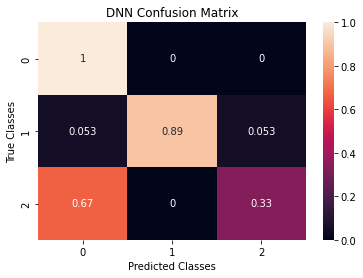

In [67]:
plt.figure()
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('DNN Confusion Matrix')

In [40]:
confusion_matrix?

In [ ]:
# import os
# import datetime

# ts = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# # Convert the model
# converter = tf.lite.TFLiteConverter.from_keras_model(DNN)
# tflite_model = converter.convert()

# # Save the model to disk
# model_path = "/Users/ryanznie/Desktop/Undergrad/Junior 2021 - 2022/Spring 2022/PY371:681 eLab/eLab Project{}.tflite".format(ts)
# open(model_path, "wb").write(tflite_model)
# print("Model is {} bytes".format(os.path.getsize(model_path)))

In [ ]:
# import serial

# arduino = serial.Serial(port='/dev/cu.usbmodem14301', baudrate=9600, timeout=.1)

# arduino.close()
# arduino.open()

# while True: 
#     data = arduino.readline()
#     print(data.decode())